# Explanatory Data Analysis Challenge (Olympic Games)

**Questions to Answer:**

* Why are some countries more successful than other countries?

* Do standard of living (GDP), Population and Politics matter?

* Are some countries more successful in Summer/Winter. Why?

* Are in some countries Men/Women more successful? Why?

* Do Traditions?National sport matter?

## Data Import and Inspection

Import the Datasets Summer (__summer.csv__), Winter (__winter.csv__) and dictionary (__dictionary.csv__) and Inspect! 

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
summer = pd.read_csv("summer.csv")
summer.head()

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
0,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100M Freestyle,Gold
1,1896,Athens,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100M Freestyle,Silver
2,1896,Athens,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100M Freestyle For Sailors,Bronze
3,1896,Athens,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100M Freestyle For Sailors,Gold
4,1896,Athens,Aquatics,Swimming,"CHASAPIS, Spiridon",GRE,Men,100M Freestyle For Sailors,Silver


In [3]:
winter = pd.read_csv("winter.csv")
winter.head()

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
0,1924,Chamonix,Biathlon,Biathlon,"BERTHET, G.",FRA,Men,Military Patrol,Bronze
1,1924,Chamonix,Biathlon,Biathlon,"MANDRILLON, C.",FRA,Men,Military Patrol,Bronze
2,1924,Chamonix,Biathlon,Biathlon,"MANDRILLON, Maurice",FRA,Men,Military Patrol,Bronze
3,1924,Chamonix,Biathlon,Biathlon,"VANDELLE, André",FRA,Men,Military Patrol,Bronze
4,1924,Chamonix,Biathlon,Biathlon,"AUFDENBLATTEN, Adolf",SUI,Men,Military Patrol,Gold


In [4]:
dic = pd.read_csv('dictionary.csv')
dic.head()

,Country,Code,Population,GDP per Capita
0,Afghanistan,AFG,32526562.0,594.323081
1,Albania,ALB,2889167.0,3945.217582
2,Algeria,ALG,39666519.0,4206.031232
3,American Samoa*,ASA,55538.0,NaN
4,Andorra,AND,70473.0,NaN


In [5]:
summer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31165 entries, 0 to 31164
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Year        31165 non-null  int64 
 1   City        31165 non-null  object
 2   Sport       31165 non-null  object
 3   Discipline  31165 non-null  object
 4   Athlete     31165 non-null  object
 5   Country     31161 non-null  object
 6   Gender      31165 non-null  object
 7   Event       31165 non-null  object
 8   Medal       31165 non-null  object
dtypes: int64(1), object(8)
memory usage: 2.1+ MB


In [6]:
winter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5770 entries, 0 to 5769
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Year        5770 non-null   int64 
 1   City        5770 non-null   object
 2   Sport       5770 non-null   object
 3   Discipline  5770 non-null   object
 4   Athlete     5770 non-null   object
 5   Country     5770 non-null   object
 6   Gender      5770 non-null   object
 7   Event       5770 non-null   object
 8   Medal       5770 non-null   object
dtypes: int64(1), object(8)
memory usage: 405.8+ KB


## Merging and Concatenating

1. __Merge__ Summer and Winter (one row for each Medal awarded in any Olympic Games) and save the merged DataFrame in __olympics__. 
2. An __additional column__ (e.g. "Edition") shall indicate the Edition -> __Summer or Winter__.
3. Add the __full Country name__ from dictionary to olympics (e.g. France for FRA).

**1. Adding additional column "Edition"**

In [7]:
summer["Edition"] = "Summer"
summer.head()

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal,Edition
0,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100M Freestyle,Gold,Summer
1,1896,Athens,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100M Freestyle,Silver,Summer
2,1896,Athens,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100M Freestyle For Sailors,Bronze,Summer
3,1896,Athens,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100M Freestyle For Sailors,Gold,Summer
4,1896,Athens,Aquatics,Swimming,"CHASAPIS, Spiridon",GRE,Men,100M Freestyle For Sailors,Silver,Summer


In [8]:
winter["Edition"] = "Winter"
winter.head()

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal,Edition
0,1924,Chamonix,Biathlon,Biathlon,"BERTHET, G.",FRA,Men,Military Patrol,Bronze,Winter
1,1924,Chamonix,Biathlon,Biathlon,"MANDRILLON, C.",FRA,Men,Military Patrol,Bronze,Winter
2,1924,Chamonix,Biathlon,Biathlon,"MANDRILLON, Maurice",FRA,Men,Military Patrol,Bronze,Winter
3,1924,Chamonix,Biathlon,Biathlon,"VANDELLE, André",FRA,Men,Military Patrol,Bronze,Winter
4,1924,Chamonix,Biathlon,Biathlon,"AUFDENBLATTEN, Adolf",SUI,Men,Military Patrol,Gold,Winter


**Concatenating summer and winter datasets together**

In [41]:
olympics = pd.concat([summer, winter], ignore_index=True)

In [42]:
olympics.head()

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal,Edition
0,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100M Freestyle,Gold,Summer
1,1896,Athens,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100M Freestyle,Silver,Summer
2,1896,Athens,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100M Freestyle For Sailors,Bronze,Summer
3,1896,Athens,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100M Freestyle For Sailors,Gold,Summer
4,1896,Athens,Aquatics,Swimming,"CHASAPIS, Spiridon",GRE,Men,100M Freestyle For Sailors,Silver,Summer


In [43]:
dic.head()

,Country,Code,Population,GDP per Capita
0,Afghanistan,AFG,32526562.0,594.323081
1,Albania,ALB,2889167.0,3945.217582
2,Algeria,ALG,39666519.0,4206.031232
3,American Samoa*,ASA,55538.0,NaN
4,Andorra,AND,70473.0,NaN


**Converting code country to name of the country using the dic data**

In [34]:
mapper = dic.set_index('Code').T.to_dict('records')[0]

In [44]:
olympics["Country_Code"] = olympics.Country.map(mapper)

In [45]:
olympics.head()

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal,Edition,Country_Code
0,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100M Freestyle,Gold,Summer,Hungary
1,1896,Athens,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100M Freestyle,Silver,Summer,Austria
2,1896,Athens,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100M Freestyle For Sailors,Bronze,Summer,Greece
3,1896,Athens,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100M Freestyle For Sailors,Gold,Summer,Greece
4,1896,Athens,Aquatics,Swimming,"CHASAPIS, Spiridon",GRE,Men,100M Freestyle For Sailors,Silver,Summer,Greece


In [47]:
olympics.Country_Code.unique()

array(['Hungary', 'Austria', 'Greece', 'United States', 'Germany',
       'United Kingdom', 'France', 'Australia', 'Denmark', 'Switzerland',
       nan, 'Netherlands', 'Belgium', 'India', 'Canada', 'Sweden',
       'Norway', 'Spain', 'Italy', 'Cuba', 'South Africa', 'Finland',
       'Estonia', 'New Zealand', 'Brazil', 'Japan', 'Luxembourg',
       'Argentina', 'Poland', 'Portugal', 'Uruguay', 'Haiti', 'Egypt',
       'Philippines', 'Ireland', 'Chile', 'Latvia', 'Mexico', 'Turkey',
       'Panama', 'Jamaica', 'Sri Lanka', 'Korea, South', 'Puerto Rico*',
       'Peru', 'Iran', 'Trinidad and Tobago', 'Venezuela', 'Bulgaria',
       'Lebanon', 'Iceland', 'Pakistan', 'Bahamas', 'Taiwan', 'Ethiopia',
       'Morocco', 'Ghana', 'Iraq', 'Singapore', 'Tunisia', 'Kenya',
       'Nigeria', 'Uganda', 'Cameroon', 'Mongolia', 'Korea, North',
       'Colombia', 'Niger', 'Thailand', 'Bermuda*', 'Tanzania', 'Guyana',
       'Zimbabwe', 'China', "Cote d'Ivoire", 'Zambia',
       'Dominican Republic', '

**Another way of doing so:**

olympics.merge(dic.iloc[:, -2], how = "left", left_on ="Country", right_on = "Code").drop(columns=["Code"]

## Data Cleaning (Part 1)

1. If you haven´t done it yet: Assign appropriate __Column Headers__ to Country Codes (e.g. __"Code"__) and full Country Names (e.g. __"Country"__).
2. __Remove Spaces__ from column headers in olympics and dictionary.
3. For some Country Codes, there is no corresponding __full Country Name__ available (e.g. for "URS") -> __missing values__ in olympics. Identify these Country Codes and search the Web for the full Country Names. __Replace__ missing values! (Alternatively, you can find a Solution for this at the end of this Notebook!) 

In [50]:
olympics.rename(columns={"Country": "Code", "Country_Code": "Country"}, inplace=True)
olympics.head()

,Year,City,Sport,Discipline,Athlete,Code,Gender,Event,Medal,Edition,Country
0,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100M Freestyle,Gold,Summer,Hungary
1,1896,Athens,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100M Freestyle,Silver,Summer,Austria
2,1896,Athens,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100M Freestyle For Sailors,Bronze,Summer,Greece
3,1896,Athens,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100M Freestyle For Sailors,Gold,Summer,Greece
4,1896,Athens,Aquatics,Swimming,"CHASAPIS, Spiridon",GRE,Men,100M Freestyle For Sailors,Silver,Summer,Greece


**Removing space from columns headers**

In [53]:
dic.columns = dic.columns.str.replace(" ", "_")
dic.head()

,Country,Code,Population,GDP_per_Capita
0,Afghanistan,AFG,32526562.0,594.323081
1,Albania,ALB,2889167.0,3945.217582
2,Algeria,ALG,39666519.0,4206.031232
3,American Samoa*,ASA,55538.0,NaN
4,Andorra,AND,70473.0,NaN


* No space on olympics column headers

In [73]:
olympics.loc[olympics.Country.isna()].Code.value_counts()

URS    2489
GDR     987
ROU     642
FRG     584
TCH     487
YUG     442
EUN     283
EUA     281
ZZX      48
SRB      31
ANZ      29
RU1      17
MNE      14
TTO      10
BOH       7
BWI       5
SGP       4
IOP       3
Name: Code, dtype: int64

**Replacing nan values on Country column by proper value according the Code**

In [74]:
mapper = {'URS': 'Soviet Union',
 'GDR': 'East Germany',
 'ROU': 'Romania',
 'FRG': 'West Germany',
 'TCH': 'Czechoslovakia',
 'YUG': 'Yugoslavia',
 'EUN': 'Unified Team',
 'EUA': 'Unified Team of Germany',
 'ZZX': 'Mixed teams',
 'SRB': 'Serbia',
 'ANZ': 'Australasia',
 'RU1': 'Russian Empire',
 'MNE': 'Montenegro',
 'TTO': 'Trinidad and Tobago',
 'BOH': 'Bohemia',
 'BWI': 'West Indies Federation',
 'SGP': 'Singapore',
 'IOP': 'Independent Olympic Participants'}

In [80]:
pd.Series(olympics.loc[olympics.Country.isna()].Code.map(mapper))

132         Mixed teams
133         Mixed teams
134         Mixed teams
135         Mixed teams
136         Mixed teams
              ...      
33961      Unified Team
33977    Czechoslovakia
33978    Czechoslovakia
33979    Czechoslovakia
33980    Czechoslovakia
Name: Code, Length: 6367, dtype: object

In [85]:
olympics.head()

,Year,City,Sport,Discipline,Athlete,Code,Gender,Event,Medal,Edition,Country
0,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100M Freestyle,Gold,Summer,Hungary
1,1896,Athens,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100M Freestyle,Silver,Summer,Austria
2,1896,Athens,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100M Freestyle For Sailors,Bronze,Summer,Greece
3,1896,Athens,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100M Freestyle For Sailors,Gold,Summer,Greece
4,1896,Athens,Aquatics,Swimming,"CHASAPIS, Spiridon",GRE,Men,100M Freestyle For Sailors,Silver,Summer,Greece


In [83]:
index_na = olympics.loc[olympics.Country.isna()].Country.index

In [94]:
olympics.loc[olympics.Country.isna(), "Country"] = olympics.loc[olympics.Country.isna()].Code.map(mapper).values

In [95]:
olympics.loc[index_na, 'Country'] 

132         Mixed teams
133         Mixed teams
134         Mixed teams
135         Mixed teams
136         Mixed teams
              ...      
33961      Unified Team
33977    Czechoslovakia
33978    Czechoslovakia
33979    Czechoslovakia
33980    Czechoslovakia
Name: Country, Length: 6367, dtype: object

In [96]:
olympics.Country.unique()

array(['Hungary', 'Austria', 'Greece', 'United States', 'Germany',
       'United Kingdom', 'France', 'Australia', 'Denmark', 'Switzerland',
       'Mixed teams', 'Netherlands', 'Belgium', 'India', 'Canada',
       'Bohemia', 'Sweden', 'Norway', 'Spain', 'Italy', 'Cuba',
       'Australasia', 'South Africa', 'Finland', 'Russian Empire',
       'Estonia', 'Czechoslovakia', 'New Zealand', 'Brazil', 'Japan',
       'Luxembourg', 'Argentina', 'Poland', 'Portugal', 'Uruguay',
       'Yugoslavia', 'Romania', 'Haiti', 'Egypt', 'Philippines',
       'Ireland', 'Chile', 'Latvia', 'Mexico', 'Turkey', 'Panama',
       'Jamaica', 'Sri Lanka', 'Korea, South', 'Puerto Rico*', 'Peru',
       'Iran', 'Trinidad and Tobago', 'Soviet Union', 'Venezuela',
       'Bulgaria', 'Lebanon', 'Unified Team of Germany', 'Iceland',
       'Pakistan', 'Bahamas', 'West Indies Federation', 'Taiwan',
       'Ethiopia', 'Morocco', 'Ghana', 'Iraq', 'Singapore', 'Tunisia',
       'Kenya', 'Nigeria', 'East Germany', 'West 

## Data Cleaning (Part 2)

1. __Remove rows__ from olympics where the Country code is unknown. (Make sure you reset the Index -> RangeIndex)
2. Convert the column __Medal__ into an __ordered Categorical__ column ("Bronze" < "Silver" < "Gold")

In [97]:
olympics[olympics.Country.isna()]

,Year,City,Sport,Discipline,Athlete,Code,Gender,Event,Medal,Edition,Country
29603,2012,London,Athletics,Athletics,Pending,NaN,Women,1500M,Gold,Summer,NaN
31072,2012,London,Weightlifting,Weightlifting,Pending,NaN,Women,63KG,Gold,Summer,NaN
31091,2012,London,Weightlifting,Weightlifting,Pending,NaN,Men,94KG,Silver,Summer,NaN
31110,2012,London,Wrestling,Wrestling Freestyle,"KUDUKHOV, Besik",NaN,Men,Wf 60 KG,Silver,Summer,NaN


In [100]:
olympics.dropna(subset=["Code"], inplace=True)

In [101]:
olympics[olympics.Country.isna()]

,Year,City,Sport,Discipline,Athlete,Code,Gender,Event,Medal,Edition,Country


In [102]:
olympics.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36931 entries, 0 to 36934
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Year        36931 non-null  int64 
 1   City        36931 non-null  object
 2   Sport       36931 non-null  object
 3   Discipline  36931 non-null  object
 4   Athlete     36931 non-null  object
 5   Code        36931 non-null  object
 6   Gender      36931 non-null  object
 7   Event       36931 non-null  object
 8   Medal       36931 non-null  object
 9   Edition     36931 non-null  object
 10  Country     36931 non-null  object
dtypes: int64(1), object(10)
memory usage: 4.6+ MB


In [103]:
olympics.Medal = olympics.Medal.astype('category')

In [104]:
olympics.Medal.sort_values()

36934    Bronze
25565    Bronze
25562    Bronze
25559    Bronze
11084    Bronze
          ...  
10811    Silver
10810    Silver
10809    Silver
25834    Silver
18465    Silver
Name: Medal, Length: 36931, dtype: category
Categories (3, object): ['Bronze', 'Gold', 'Silver']

In [105]:
olympics.Medal.cat.set_categories(["Bronze", "Silver", "Gold"], ordered=True, inplace=True)

In [106]:
olympics.Medal.sort_values()

36934    Bronze
8916     Bronze
15339    Bronze
27698    Bronze
8919     Bronze
          ...  
25833      Gold
10807      Gold
10806      Gold
10804      Gold
0          Gold
Name: Medal, Length: 36931, dtype: category
Categories (3, object): ['Bronze' < 'Silver' < 'Gold']

## What are the most successful countries of all times?

For the next questions, use Seaborn plots.
1. What are the __Top 10__ Countries by __total medals__?
2. __Split__ the total medals of Top 10 Countries into __Summer / Winter__. Are there typical Summer/Winter Games Countries? 
3. __Split__ the total medals of Top 10 Countries into __Gold, Silver, Bronze__. 

In [107]:
olympics.head() 

,Year,City,Sport,Discipline,Athlete,Code,Gender,Event,Medal,Edition,Country
0,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100M Freestyle,Gold,Summer,Hungary
1,1896,Athens,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100M Freestyle,Silver,Summer,Austria
2,1896,Athens,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100M Freestyle For Sailors,Bronze,Summer,Greece
3,1896,Athens,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100M Freestyle For Sailors,Gold,Summer,Greece
4,1896,Athens,Aquatics,Swimming,"CHASAPIS, Spiridon",GRE,Men,100M Freestyle For Sailors,Silver,Summer,Greece


In [112]:
index = olympics.Country.value_counts()[:10].index
values = olympics.Country.value_counts()[:10].values

In [113]:
values

array([5238, 2489, 1799, 1665, 1548, 1488, 1477, 1274, 1204, 1091],
      dtype=int64)

**1. Top 10 Countries with more Medals**

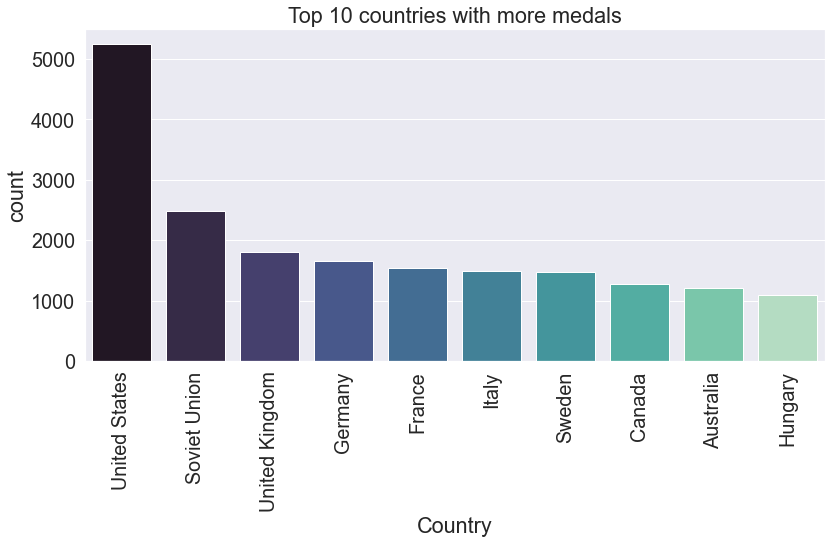

In [154]:
plt.figure(figsize=(12,8))
sns.set(font_scale=1.8)
sns.countplot(data=olympics, x=olympics.loc[olympics.Country.isin(index)].Country,order=index, palette="mako")
plt.title("Top 10 countries with more medals")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

**2. Split the total medals of Top 10 Countries into Summer / Winter. Are there typical Summer/Winter Games Countries?**

In [166]:
summer_ed = olympics.loc[(olympics.Country.isin(index)) & (olympics.Edition == "Summer")]

winter_ed = olympics.loc[(olympics.Country.isin(index)) & (olympics.Edition == "Winter")]

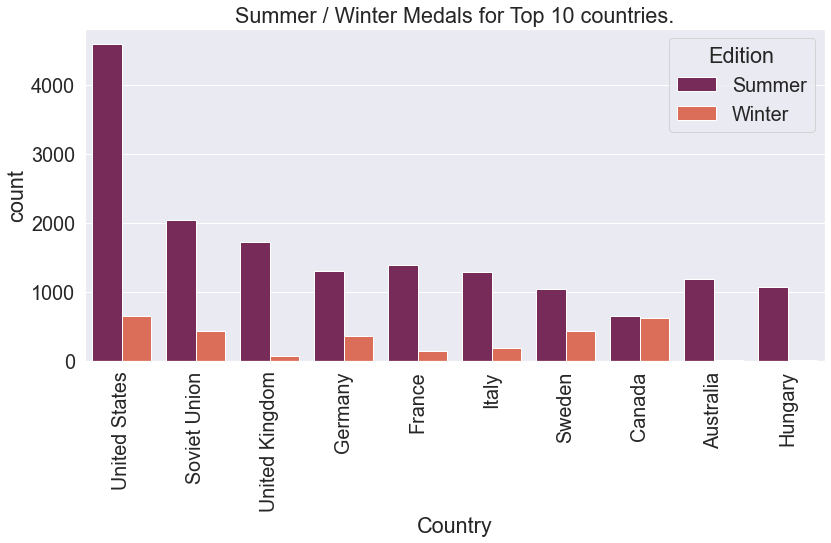

In [173]:
plt.figure(figsize=(12,8))
sns.set(font_scale=1.8)
sns.countplot(data=olympics, x=olympics.loc[olympics.Country.isin(index)].Country,order=index,
              hue=olympics.Edition, palette="rocket")
plt.title("Summer / Winter Medals for Top 10 countries.")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

**3. Split the total medals of Top 10 Countries into Gold, Silver, Bronze.**

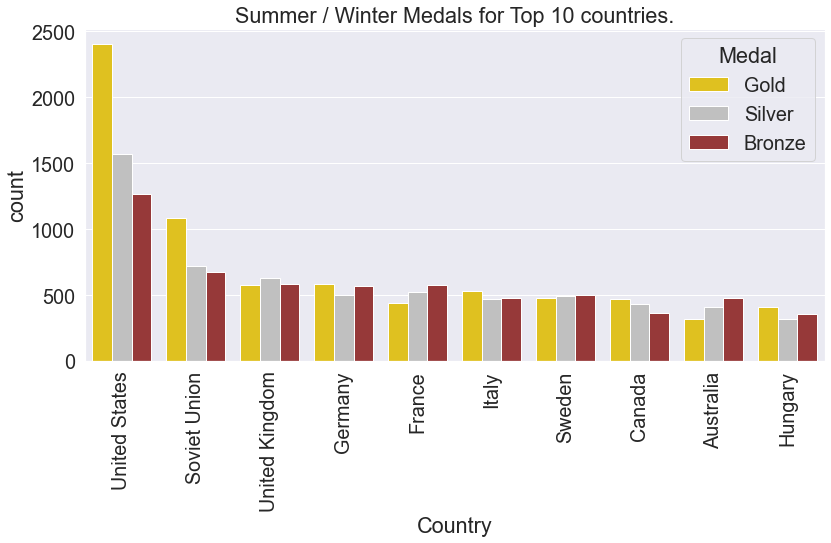

In [177]:
plt.figure(figsize=(12,8))
sns.set(font_scale=1.8)
sns.countplot(data=olympics, x=olympics.loc[olympics.Country.isin(index)].Country,order=index,
              hue=olympics.Medal, palette=['gold', 'silver', 'brown'], hue_order=["Gold", "Silver", "Bronze"])
plt.title("Summer / Winter Medals for Top 10 countries.")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

## Do GDP, Population and Politics matter?

1. Create the following __aggregated and merged__ DataFrame with __Top 50 Countries__ (you can see an excerpt with the first 12 Countries). The Column __Total_Games__ shows the __number of Participations__ (as an approximation: determine the number of Editions where Countries have won at least one medal).

In [178]:
olympics.sample(5)

,Year,City,Sport,Discipline,Athlete,Code,Gender,Event,Medal,Edition,Country
5887,1932,Los Angeles,Athletics,Athletics,"O'CALLAGHAN, Patrick",IRL,Men,Hammer Throw,Gold,Summer,Ireland
10546,1960,Rome,Rowing,Rowing,"RENNEBERG, Karl Heinz",EUA,Men,Pair-Oared Shell With Coxswain (2+),Gold,Summer,Unified Team of Germany
25176,2004,Athens,Aquatics,Diving,"TIAN, Liang",CHN,Men,10M Platform,Bronze,Summer,China
1663,1908,London,Rugby,Rugby,"DAVEY, James",GBR,Men,Rugby,Silver,Summer,United Kingdom
31754,1952,Oslo,Ice Hockey,Ice Hockey,"ALMQVIST, Göte",SWE,Men,Ice Hockey,Bronze,Winter,Sweden


**Creating new dataframe with the number of participations of each country**

In [254]:
olympics_df = olympics.copy()

In [255]:
olympics_df["Total_Games"] = 1
olympics_df.head()

,Year,City,Sport,Discipline,Athlete,Code,Gender,Event,Medal,Edition,Country,Total_Games
0,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100M Freestyle,Gold,Summer,Hungary,1
1,1896,Athens,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100M Freestyle,Silver,Summer,Austria,1
2,1896,Athens,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100M Freestyle For Sailors,Bronze,Summer,Greece,1
3,1896,Athens,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100M Freestyle For Sailors,Gold,Summer,Greece,1
4,1896,Athens,Aquatics,Swimming,"CHASAPIS, Spiridon",GRE,Men,100M Freestyle For Sailors,Silver,Summer,Greece,1


In [256]:
olympics_df = olympics_df[['Edition', 'Year', 'Country', 'Total_Games']].drop_duplicates().groupby('Country').Total_Games.sum().sort_values(ascending=False)
olympics_df.to_frame()

,Total_Games
Country,
United States,48
Sweden,47
Canada,47
France,47
Austria,46
...,...
Montenegro,1
Cote d'Ivoire,1
Eritrea,1


In [257]:
olympics_df = olympics_df.to_frame()

**Merging olympic with dic with the required columns for our final result**

In [196]:
new_olympics = pd.crosstab(index = olympics.Country,values="Count", columns=olympics.Medal, aggfunc='count', margins=True,
           margins_name="Total").fillna(0)[['Total','Gold', 'Silver', 'Bronze']]

In [203]:
new_olympics = new_olympics.sort_values(by='Total', ascending=False)[1:]

In [213]:
top_50 = new_olympics.merge(dic[["Population", "GDP_per_Capita"]], how='left', left_on=new_olympics.index, 
                   right_on=dic.Country).rename(columns={'key_0': 'Country', "GDP_per_Capita": "GDP"}).set_index('Country')[:50]



In [267]:
top_50 = top_50.merge(olympics_df, how='left', left_on=top_50.index, right_on=olympics_df.index).rename(columns={'key_0':"Country"}).set_index('Country')

In [268]:
top_50.head(12)

,Total,Gold,Silver,Bronze,Population,GDP,Total_Games
Country,,,,,,,
United States,5238,2402.0,1571.0,1265.0,321418820.0,56115.718426,48
Soviet Union,2489,1088.0,724.0,677.0,NaN,NaN,18
United Kingdom,1799,580.0,632.0,587.0,65138232.0,43875.969614,42
Germany,1665,589.0,504.0,572.0,81413145.0,41313.313995,25
France,1548,444.0,526.0,578.0,66808385.0,36205.568102,47
Italy,1488,534.0,473.0,481.0,60802085.0,29957.804315,43
Sweden,1477,476.0,496.0,505.0,9798871.0,50579.673649,47
Canada,1274,470.0,435.0,369.0,35851774.0,43248.529909,47
Australia,1204,317.0,408.0,479.0,23781169.0,56310.962993,30


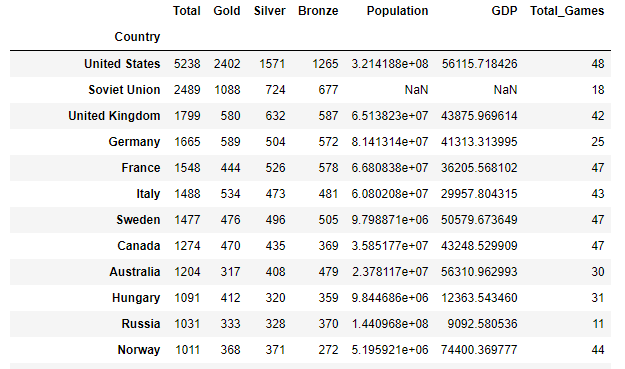

2. __Convert__ the __absolute values__ in the DataFrame into __ranks__ and save the ranks DataFrame in new variable (see screenshot). Ranks are more meaningful than absolute numbers.

In [273]:
rank_top_50 = top_50.rank(ascending=False)

In [274]:
rank_top_50.head(12)

,Total,Gold,Silver,Bronze,Population,GDP,Total_Games
Country,,,,,,,
United States,1.0,1.0,1.0,1.0,3.0,4.0,1.0
Soviet Union,2.0,2.0,2.0,2.0,NaN,NaN,28.0
United Kingdom,3.0,4.0,3.0,3.0,14.0,8.0,10.0
Germany,4.0,3.0,5.0,5.0,10.0,12.0,19.0
France,5.0,8.0,4.0,4.0,13.0,15.0,3.0
Italy,6.0,5.0,7.0,7.0,15.0,17.0,9.0
Sweden,7.0,6.0,6.0,6.0,32.0,6.0,3.0
Canada,8.0,7.0,8.0,12.0,23.0,10.0,3.0
Australia,9.0,13.0,9.0,8.0,24.0,3.0,14.0


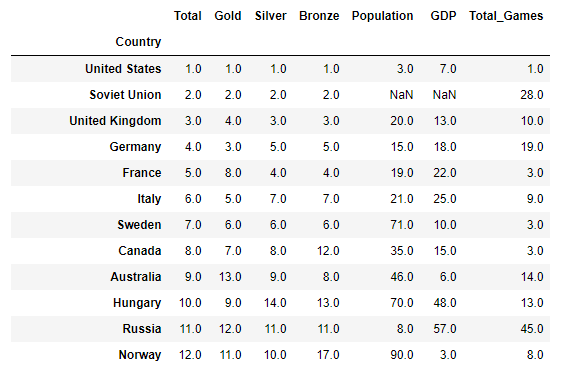

## Statistical Analysis and Hypothesis Testing with scipy

In the follwing work with __Ranks__!
Check whether __GDP__ (Standard of Living), __Total_Games__ (Political Stability measure) and __Population__ (Size) have an effect on __Total Medals__. (hint: work with spearman correlation, not with pearson correlation)

## Aggregating and Ranking

In [275]:
olympics.head()

,Year,City,Sport,Discipline,Athlete,Code,Gender,Event,Medal,Edition,Country
0,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100M Freestyle,Gold,Summer,Hungary
1,1896,Athens,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100M Freestyle,Silver,Summer,Austria
2,1896,Athens,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100M Freestyle For Sailors,Bronze,Summer,Greece
3,1896,Athens,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100M Freestyle For Sailors,Gold,Summer,Greece
4,1896,Athens,Aquatics,Swimming,"CHASAPIS, Spiridon",GRE,Men,100M Freestyle For Sailors,Silver,Summer,Greece


**Creating dataframe with the top countries per medal per Gender**

In [408]:
gender_top_50 = olympics.pivot_table(values='Medal', index='Country', columns=['Gender'], aggfunc='count', margins=True,
                     fill_value=0, margins_name="Total").sort_values(by="Total", ascending=False)

In [409]:
gender_top_50.drop("Total", axis=0, inplace=True)

In [290]:
#gender_top_50 = gender_top_50.head(50)

**Creating DataFrame for Medal per Edition**

In [410]:
edition_top_50 = olympics.pivot_table(values='Medal', index='Country', columns=['Edition'], aggfunc='count', margins=True,
                     fill_value=0, margins_name="Total").sort_values(by="Total", ascending=False)

In [411]:
edition_top_50.drop("Total", axis=0, inplace=True)

In [295]:
#edition_top_50 = edition_top_50.head(50)

**Merging both dataframe together**

In [412]:
medal_rank = gender_top_50.merge(edition_top_50, on='Country').rename(columns={'Total_x': 'Total'})

In [413]:
medal_rank.drop(columns='Total_y', axis=1, inplace=True)
medal_rank.head()

,Men,Women,Total,Summer,Winter
Country,,,,,
United States,3618,1620,5238,4585,653
Soviet Union,1807,682,2489,2049,440
United Kingdom,1470,329,1799,1720,79
Germany,1119,546,1665,1305,360
France,1351,197,1548,1396,152


In [414]:
len(medal_rank)

145

In [415]:
medal_rank = medal_rank[["Summer", "Winter", "Men", "Women", "Total"]]
medal_rank.head()

,Summer,Winter,Men,Women,Total
Country,,,,,
United States,4585,653,3618,1620,5238
Soviet Union,2049,440,1807,682,2489
United Kingdom,1720,79,1470,329,1799
Germany,1305,360,1119,546,1665
France,1396,152,1351,197,1548


In [416]:
#medal_rank_b = medal_rank.head(21).T 
country_rank = medal_rank.rank(ascending=False)
country_rank.head()

,Summer,Winter,Men,Women,Total
Country,,,,,
United States,1.0,1.0,1.0,1.0,1.0
Soviet Union,2.0,4.0,2.0,2.0,2.0
United Kingdom,3.0,19.0,3.0,11.0,3.0
Germany,5.0,7.0,7.0,4.0,4.0
France,4.0,14.0,4.0,16.5,5.0


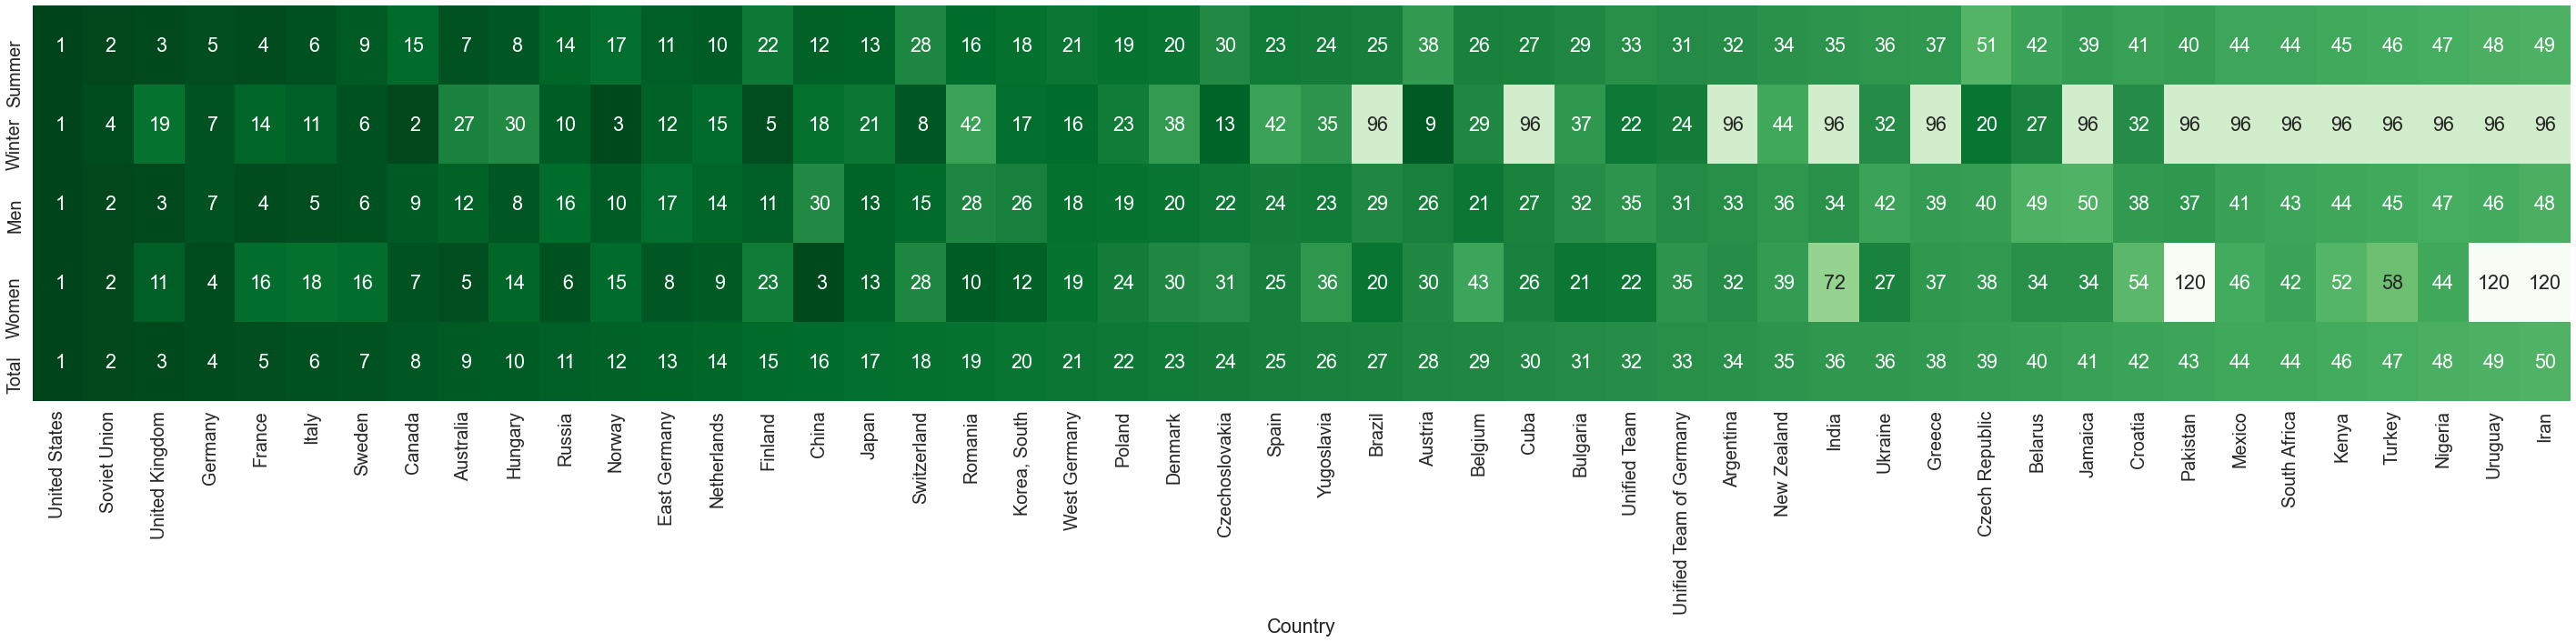

In [417]:
plt.figure(figsize=(50,8))
sns.heatmap(country_rank.head(50).T, annot=True, cmap="Greens_r", cbar=False, fmt='2.0f')
plt.show()

Create the following __Seaborn Heatmap__ with __Medal Ranks__ for Top 50 Countries (Total Medals, Summer Games Medals, Winter Games Medals, Men, Women).

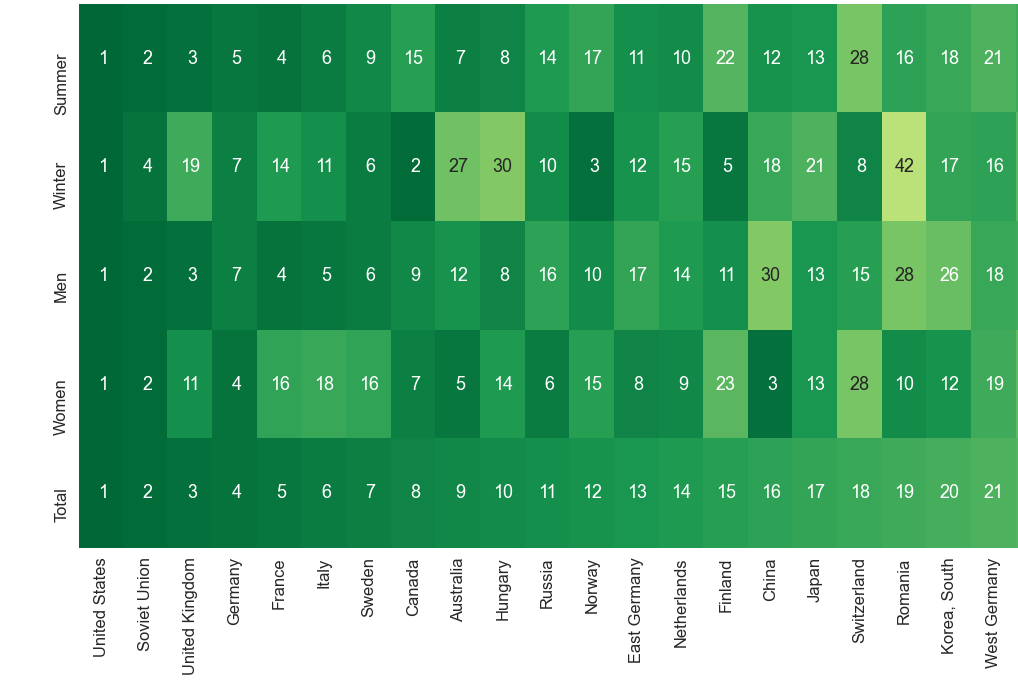

## Summer Games vs. Winter Games - does Geographical Location matter?

__Identify Countries__ that are 
1. __equally successful__ in Summer and Winter Games
2. more successful in __Summer Games__
3. more successful in __Winter Games__


What could be the reasons?

In [421]:
top_50 = country_rank.head(50)

**Teams equally successful in winter and summer according their rank**

In [423]:
top_50.loc[top_50.Summer == top_50.Winter]

,Summer,Winter,Men,Women,Total
Country,,,,,
United States,1.0,1.0,1.0,1.0,1.0


**More successful in Summer**

In [424]:
top_50.loc[top_50.Summer < top_50.Winter]

,Summer,Winter,Men,Women,Total
Country,,,,,
Soviet Union,2.0,4.0,2.0,2.0,2.0
United Kingdom,3.0,19.0,3.0,11.0,3.0
Germany,5.0,7.0,7.0,4.0,4.0
France,4.0,14.0,4.0,16.5,5.0
Italy,6.0,11.0,5.0,18.0,6.0
Australia,7.0,27.0,12.0,5.0,9.0
Hungary,8.0,30.0,8.0,14.0,10.0
East Germany,11.0,12.0,17.0,8.0,13.0
Netherlands,10.0,15.0,14.0,9.0,14.0


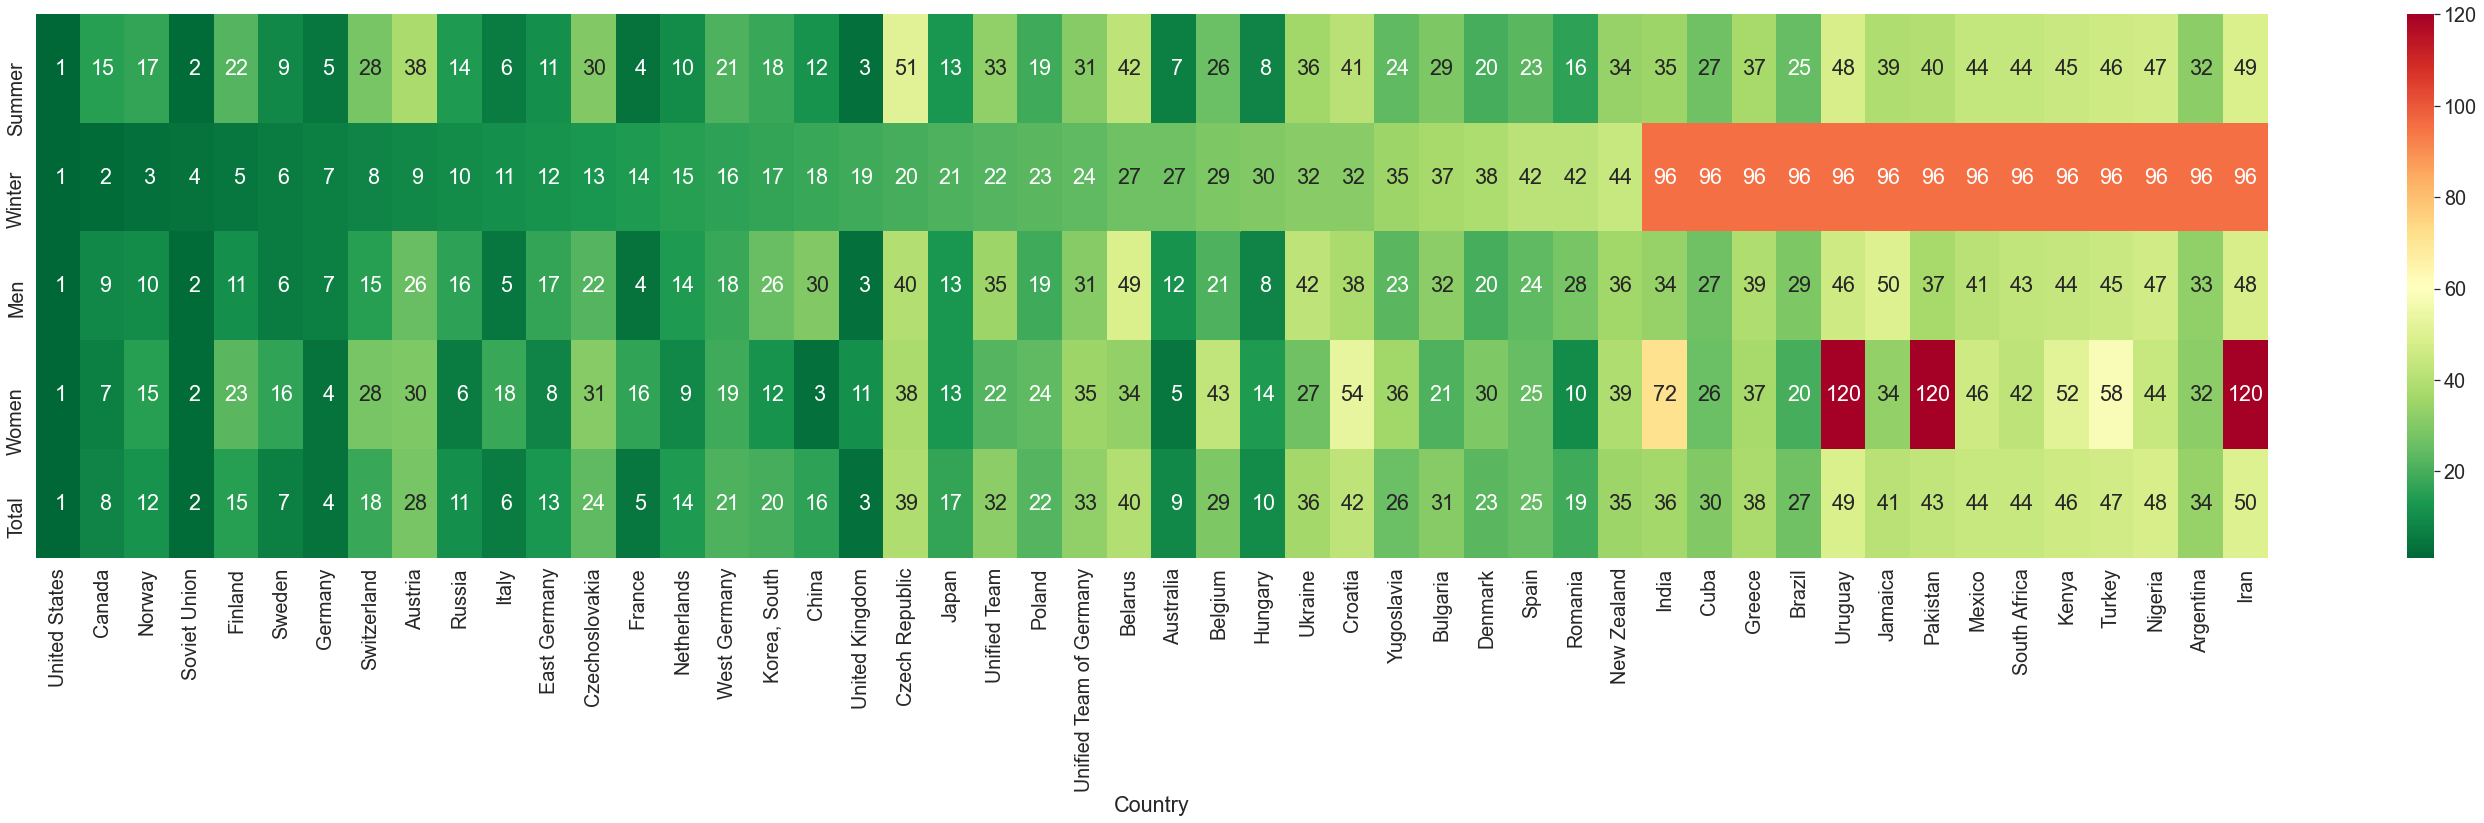

In [427]:
plt.figure(figsize=(50,10))
sns.heatmap(top_50.sort_values(by="Winter").T, annot=True, cmap='RdYlGn_r', fmt='2.0f')
plt.show()

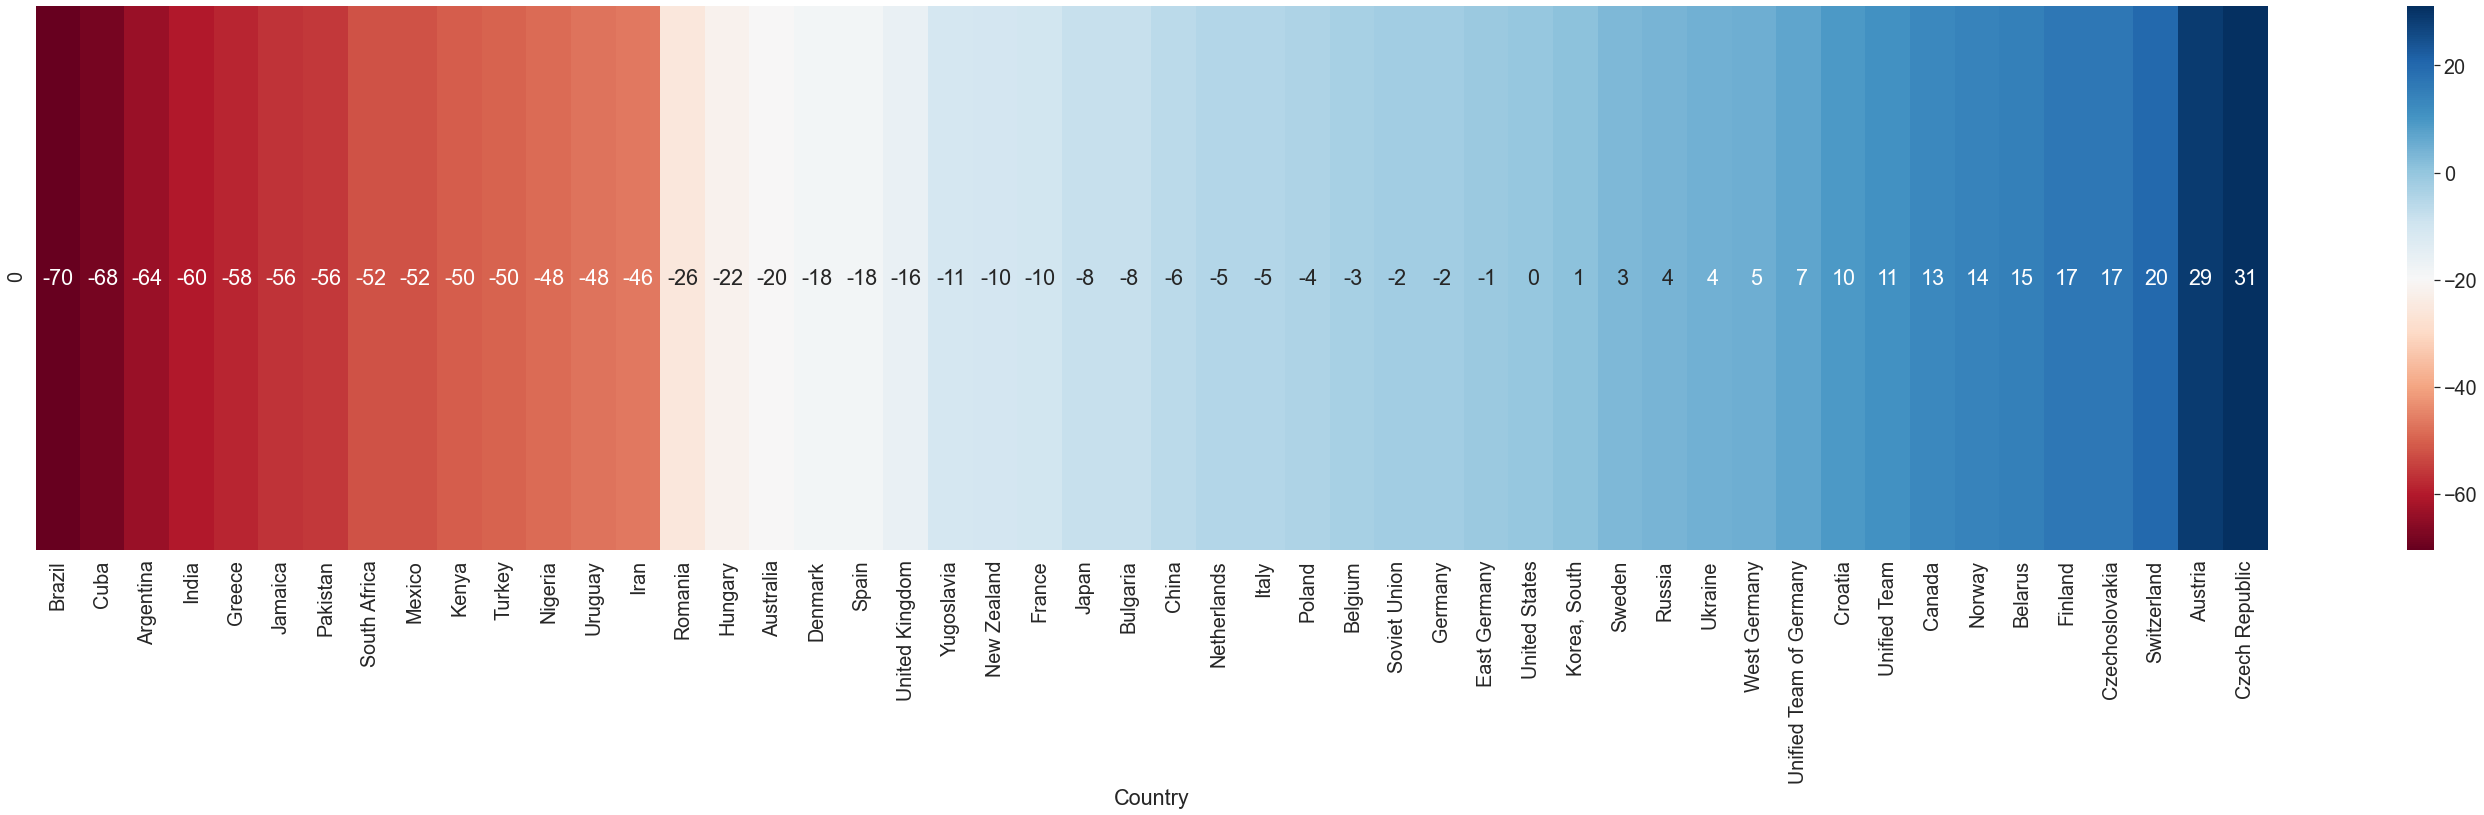

In [433]:
plt.figure(figsize=(50,10))
sns.heatmap(top_50.Summer.sub(top_50.Winter).sort_values().to_frame().T, annot=True, cmap='RdBu', fmt='2.0f')
plt.show()

**More successful in Winter**

In [425]:
top_50.loc[top_50.Summer > top_50.Winter]

,Summer,Winter,Men,Women,Total
Country,,,,,
Sweden,9.0,6.0,6.0,16.5,7.0
Canada,15.0,2.0,9.0,7.0,8.0
Russia,14.0,10.0,16.0,6.0,11.0
Norway,17.0,3.0,10.0,15.0,12.0
Finland,22.0,5.0,11.0,23.0,15.0
Switzerland,28.0,8.0,15.0,28.0,18.0
"Korea, South",18.0,17.0,25.5,12.0,20.0
West Germany,21.0,16.0,18.0,19.0,21.0
Czechoslovakia,30.0,13.0,22.0,31.0,24.0


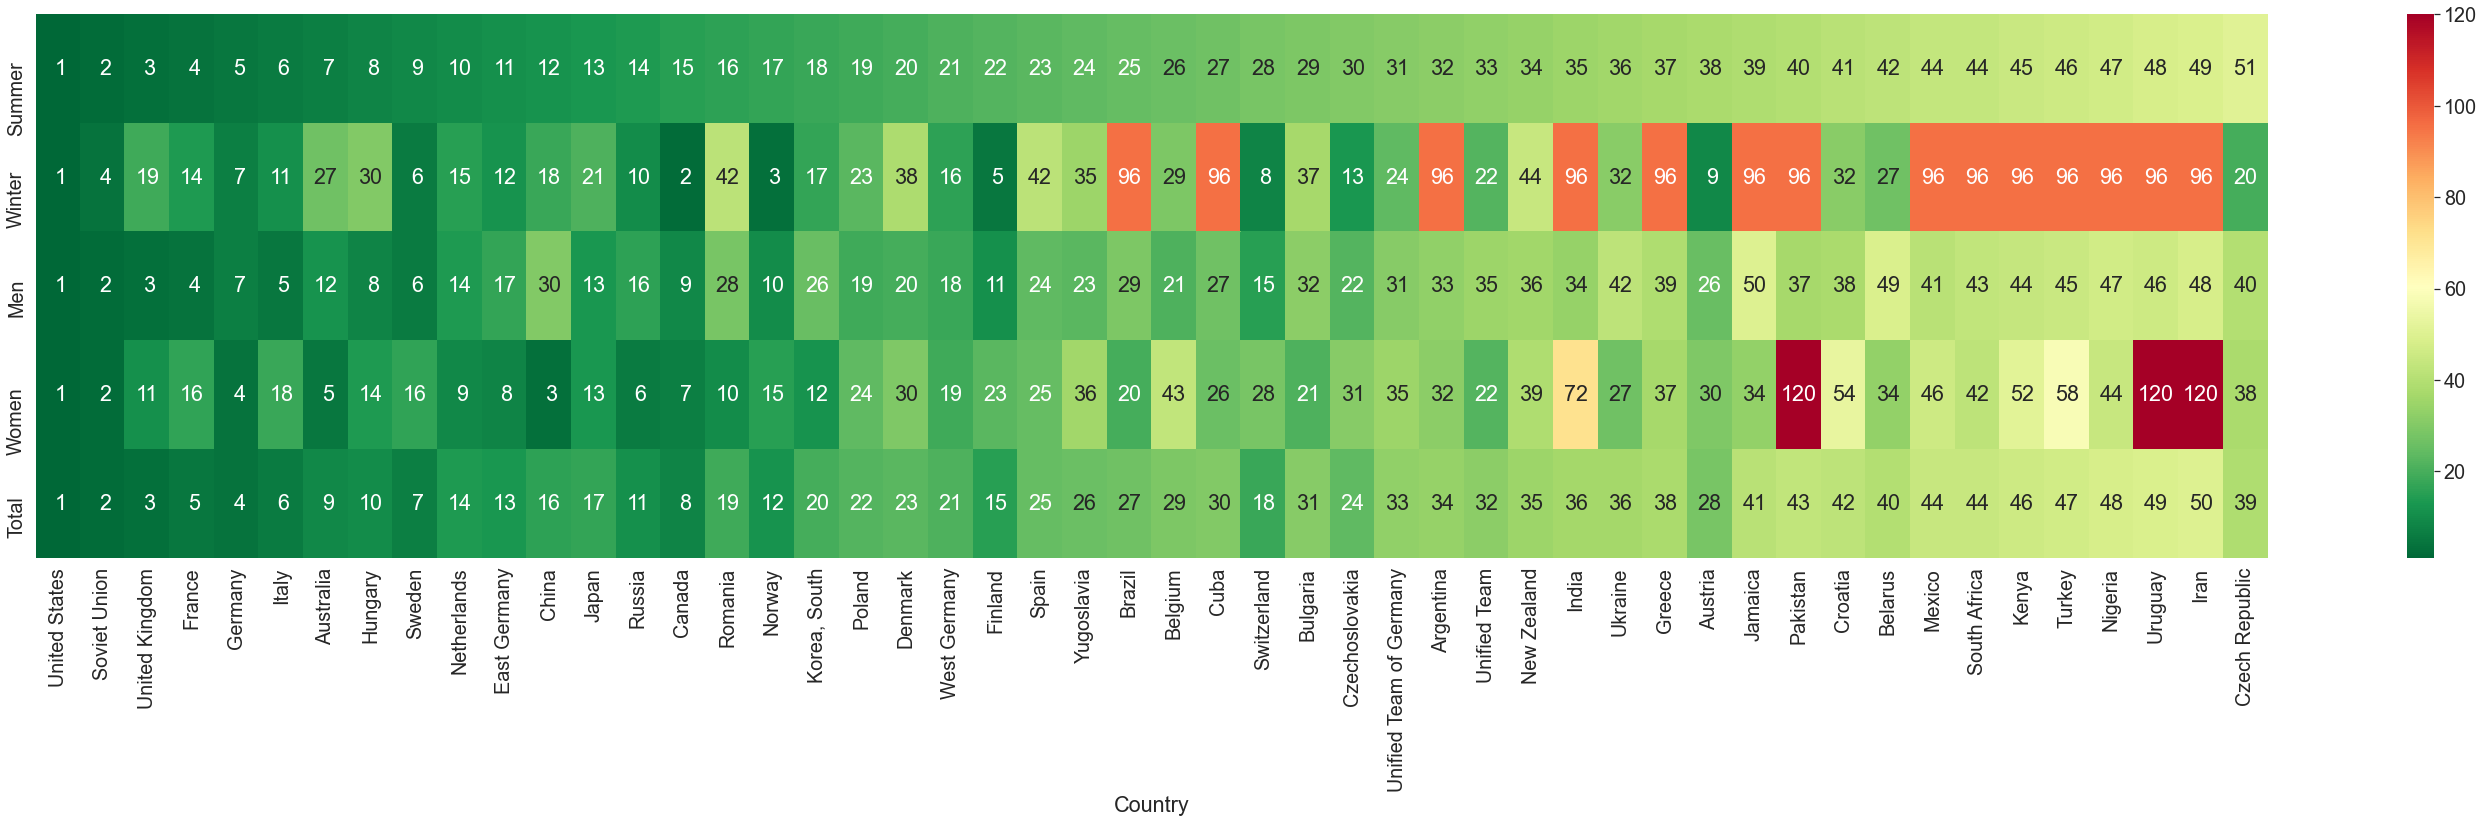

In [428]:
plt.figure(figsize=(50,10))
sns.heatmap(top_50.sort_values(by="Summer").T, annot=True, cmap='RdYlGn_r', fmt='2.0f')
plt.show()

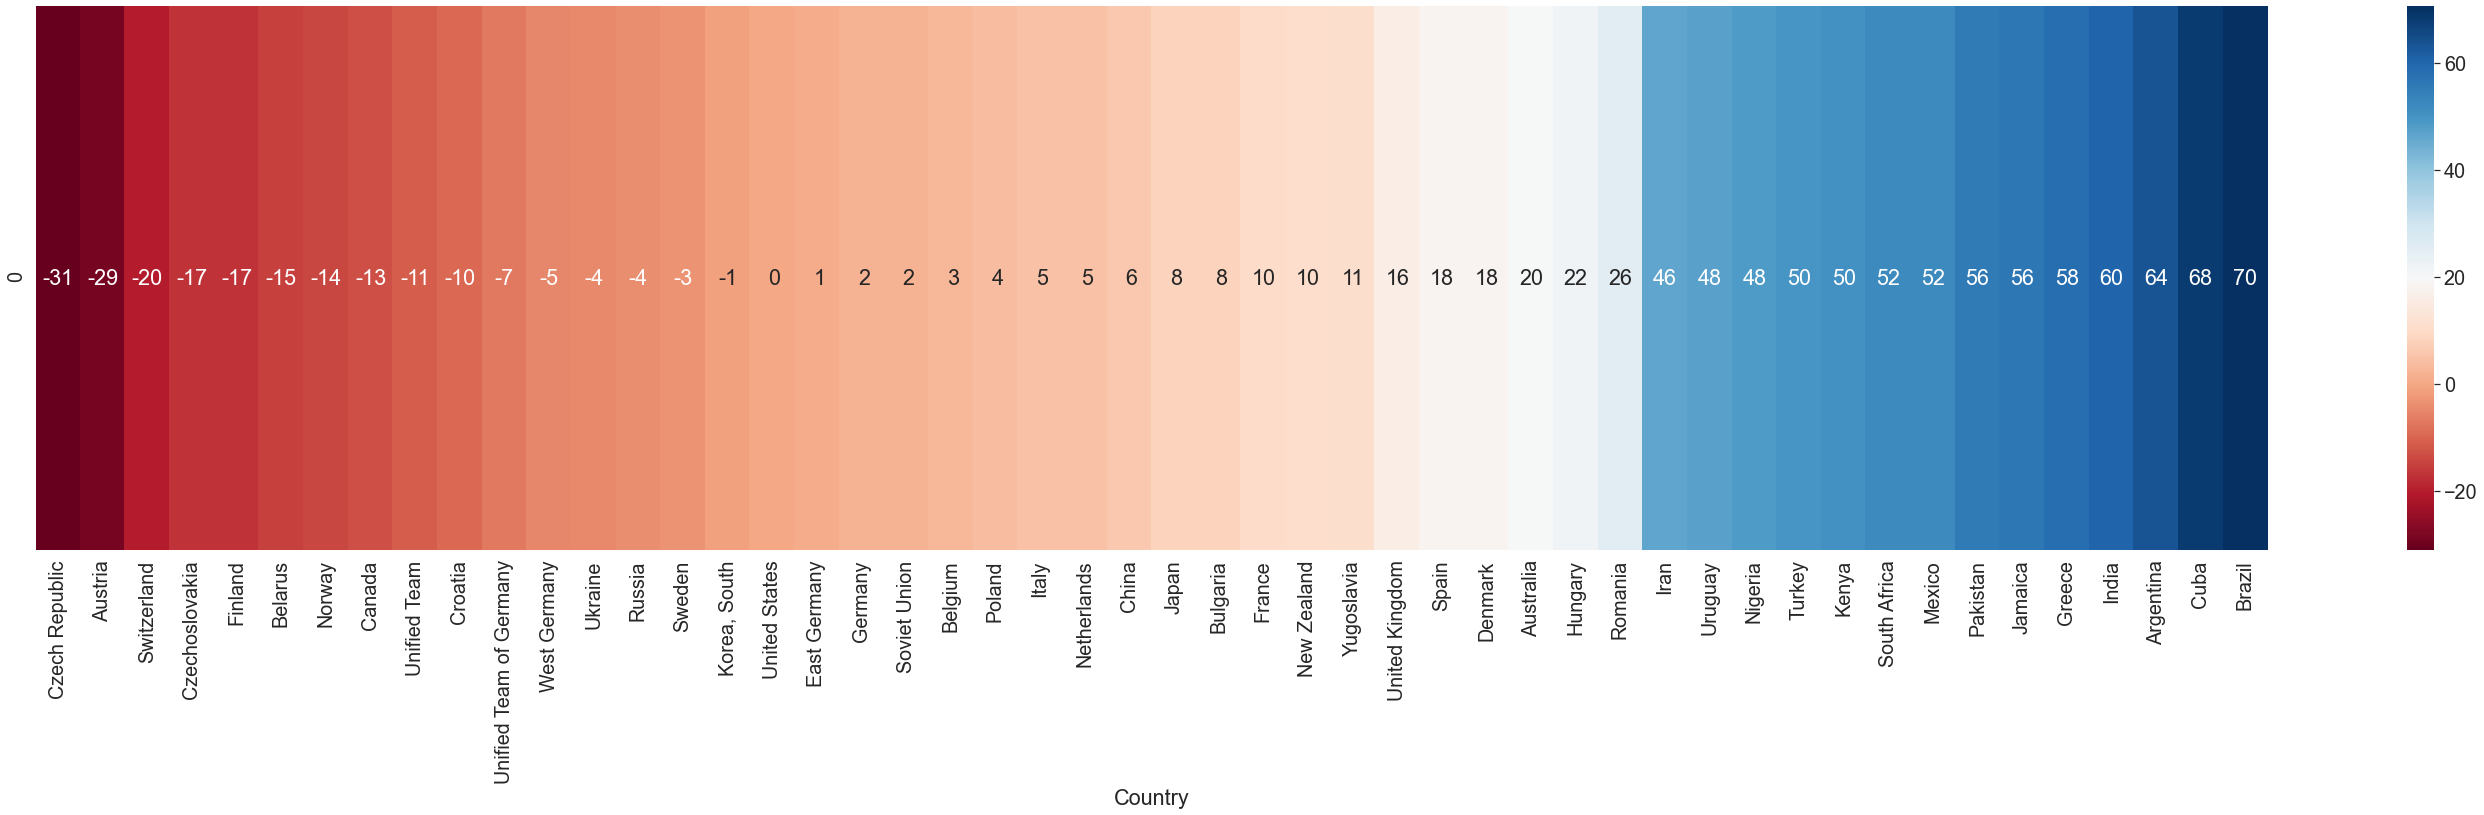

In [432]:
plt.figure(figsize=(50,10))
sns.heatmap(top_50.Winter.sub(top_50.Summer).sort_values().to_frame().T, annot=True, cmap='RdBu', fmt='2.0f')
plt.show()

**Reasons**

* The main reason some countries like Canada, Rusia, and Sweden are more successful in Winter is the geographical location. Their cold and long winter seasons make them more comfortable and adaptable for Winter sports. Different from countries such as Cuba or Jamaica, which caracterize for warmer weather.

* The second reason is that there are less sports in Winter olimpics than Winter olimpics. That's why powerful countries in Winter games such as Germany, and Italy happen to do better on Summer than Winter, but it does not mean they do bad in Winter games. 

## Men vs. Women - does Culture & Religion matter?

__Identify Countries__ where
1. Men and Women are __equally successful__
2. __Men__ are more successful
3. __Women__ are more successful

What could be the reasons?

**Rank of top 50 where Men are more succesfull than Women**

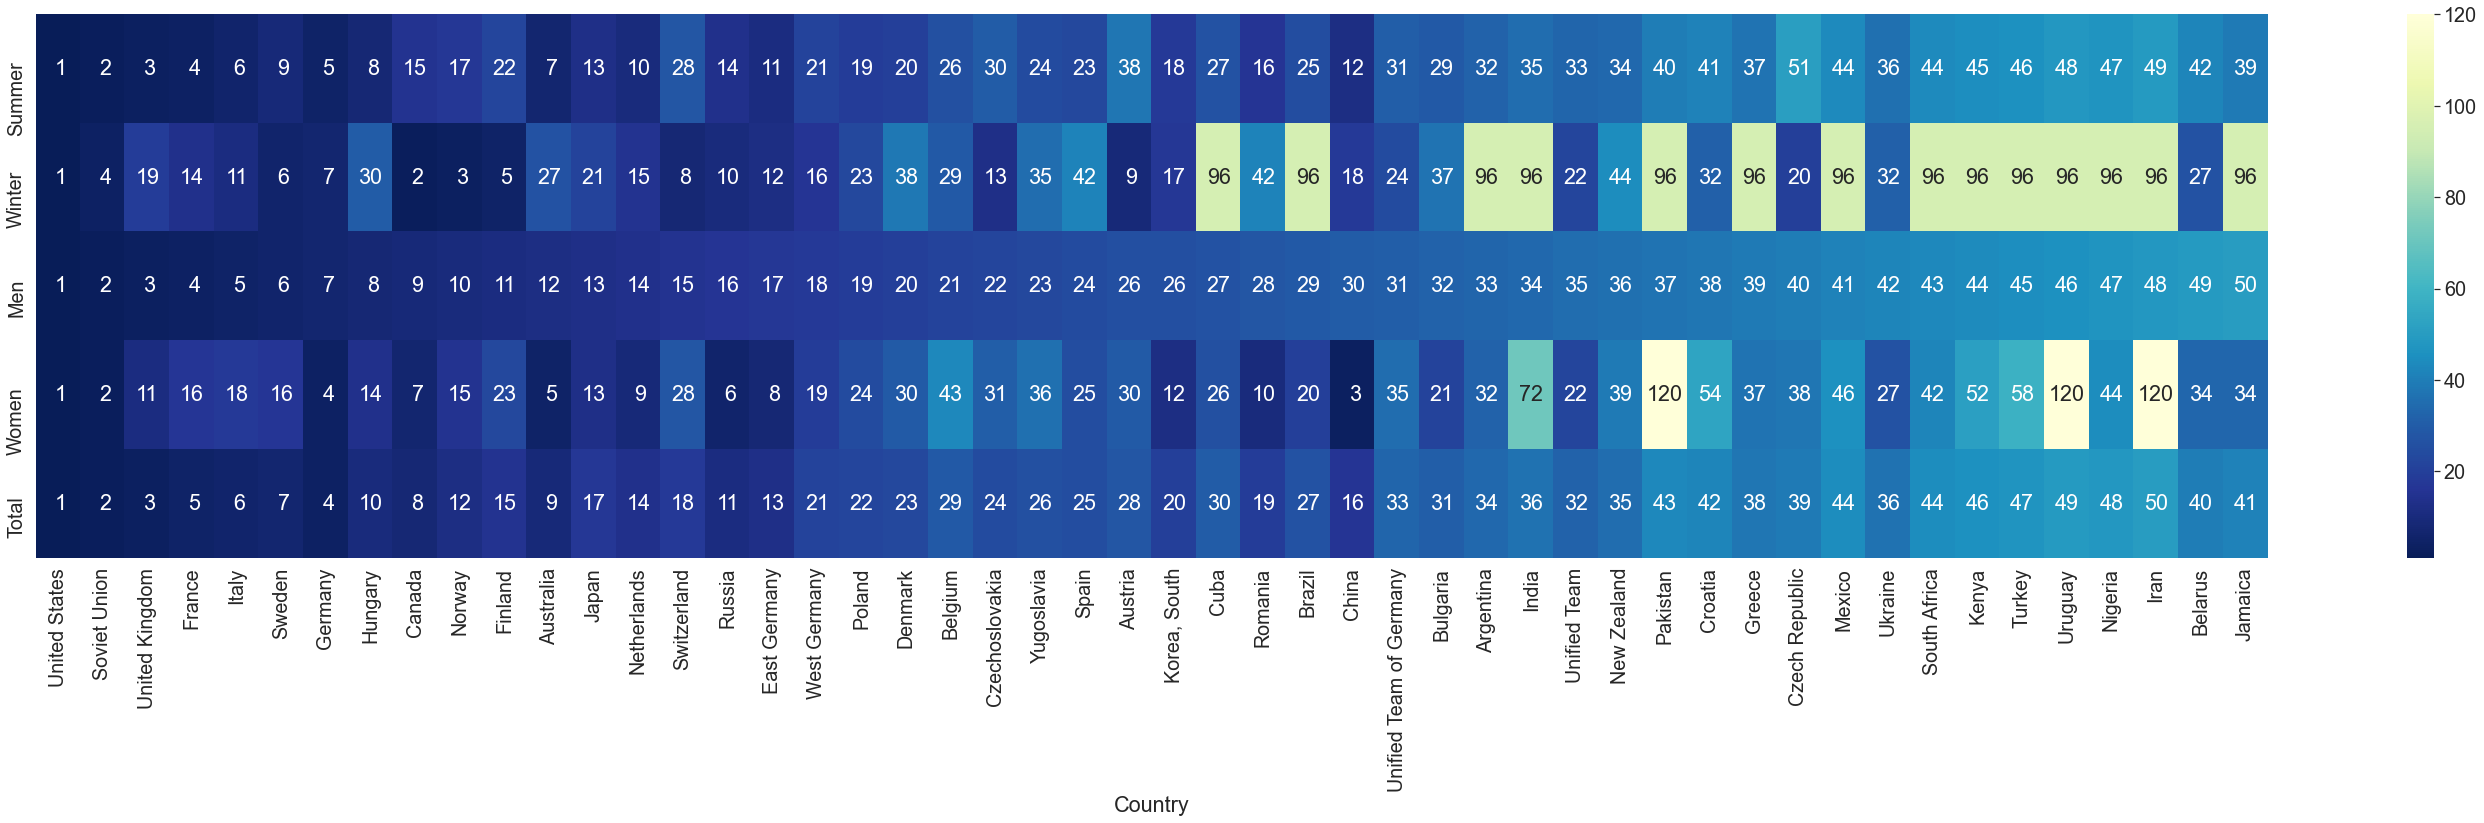

In [438]:
plt.figure(figsize=(50,10))
sns.heatmap(top_50.sort_values(by='Men').T, annot=True, cmap='YlGnBu_r', fmt='2.0f')
plt.show()

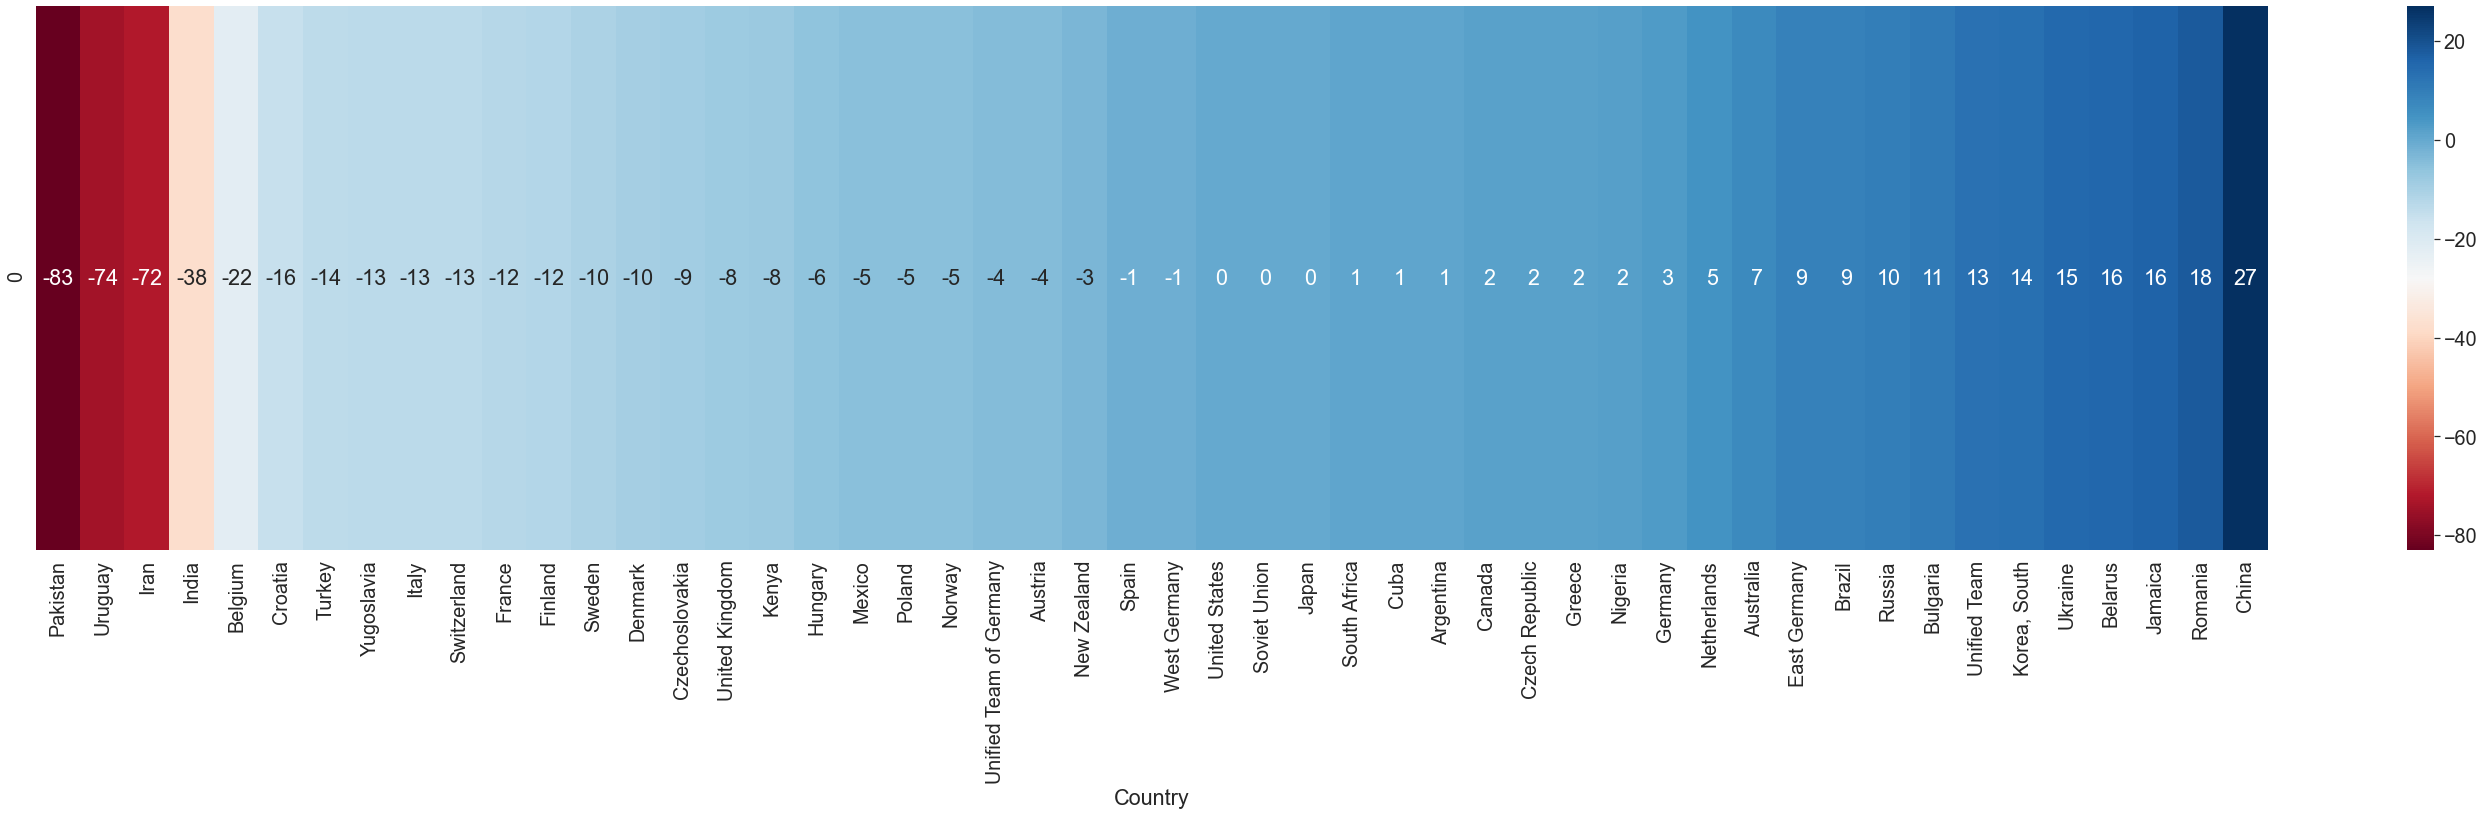

In [434]:
plt.figure(figsize=(50,10))
sns.heatmap(top_50.Men.sub(top_50.Women).sort_values().to_frame().T, annot=True, cmap='RdBu', fmt='2.0f')
plt.show()

**Countries where Women are more succesfull than Women**

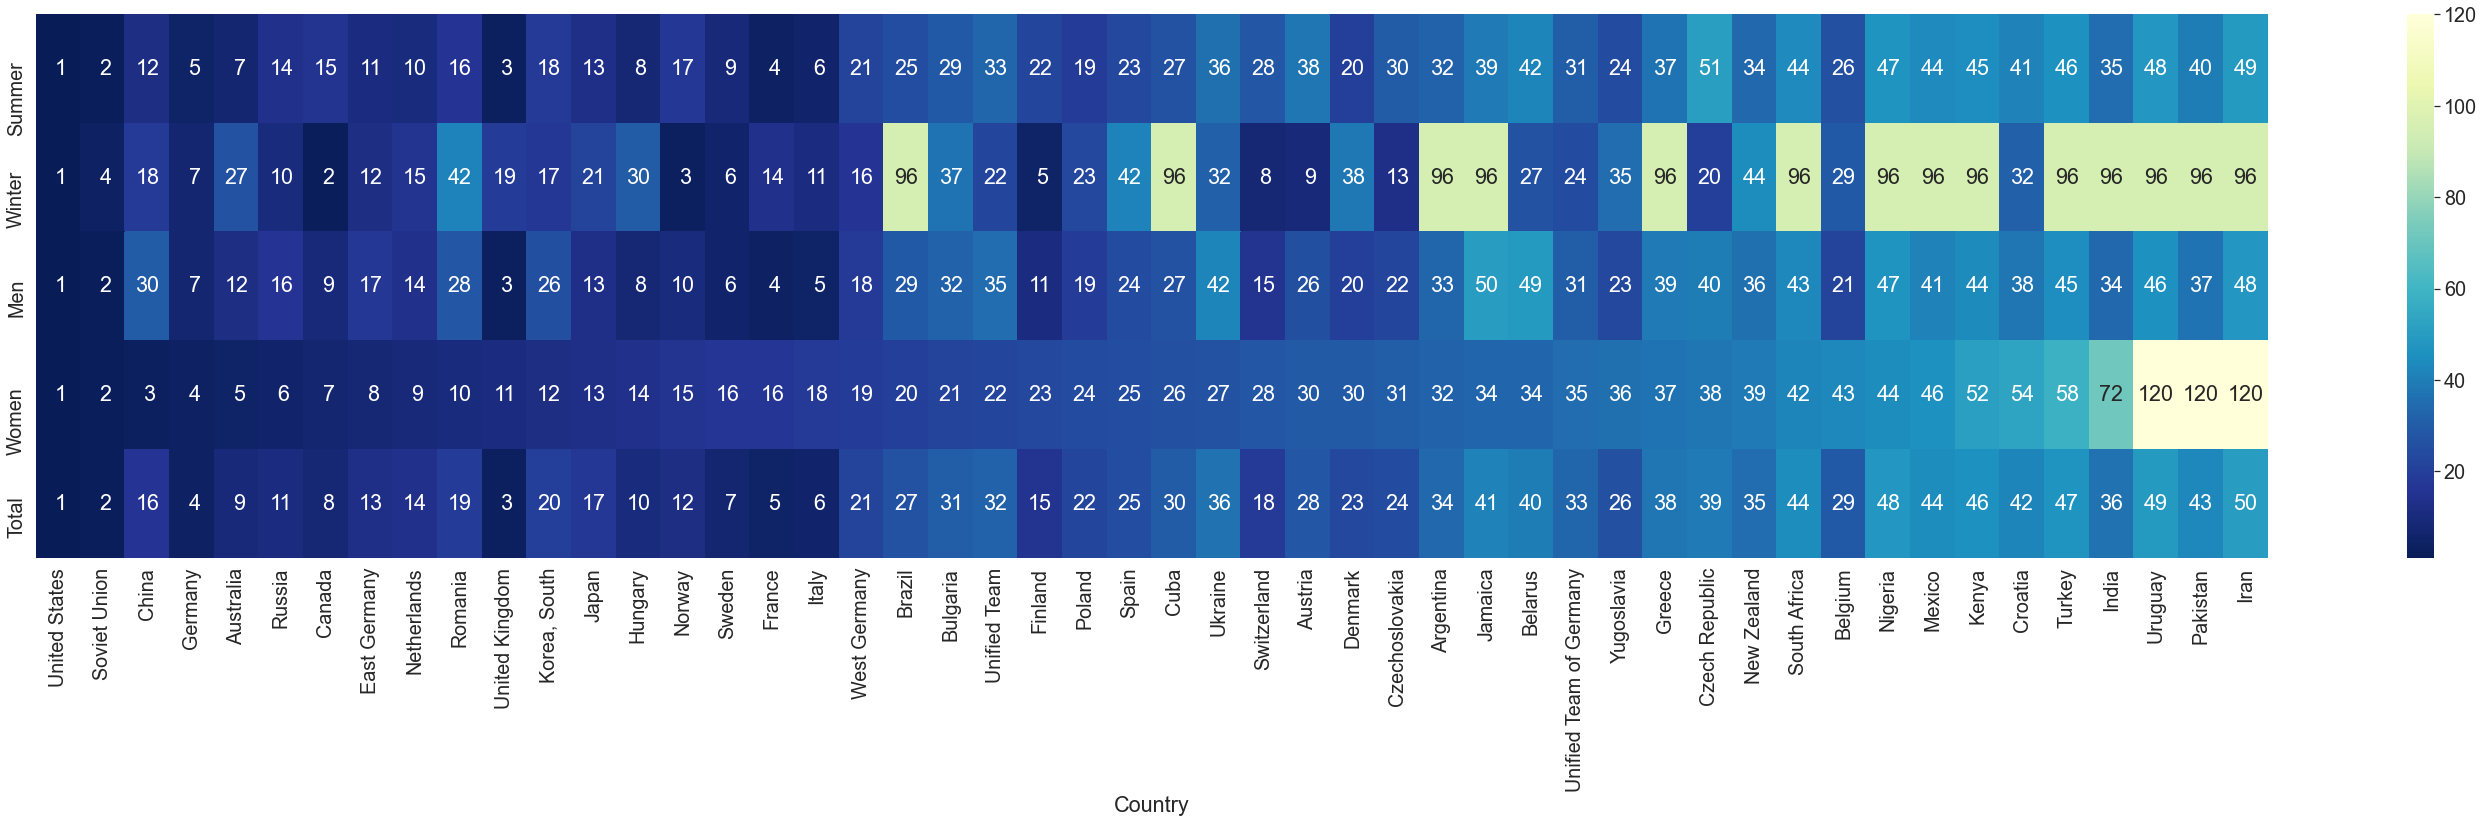

In [439]:
plt.figure(figsize=(50,10))
sns.heatmap(top_50.sort_values(by='Women').T, annot=True, cmap='YlGnBu_r', fmt='2.0f')
plt.show()

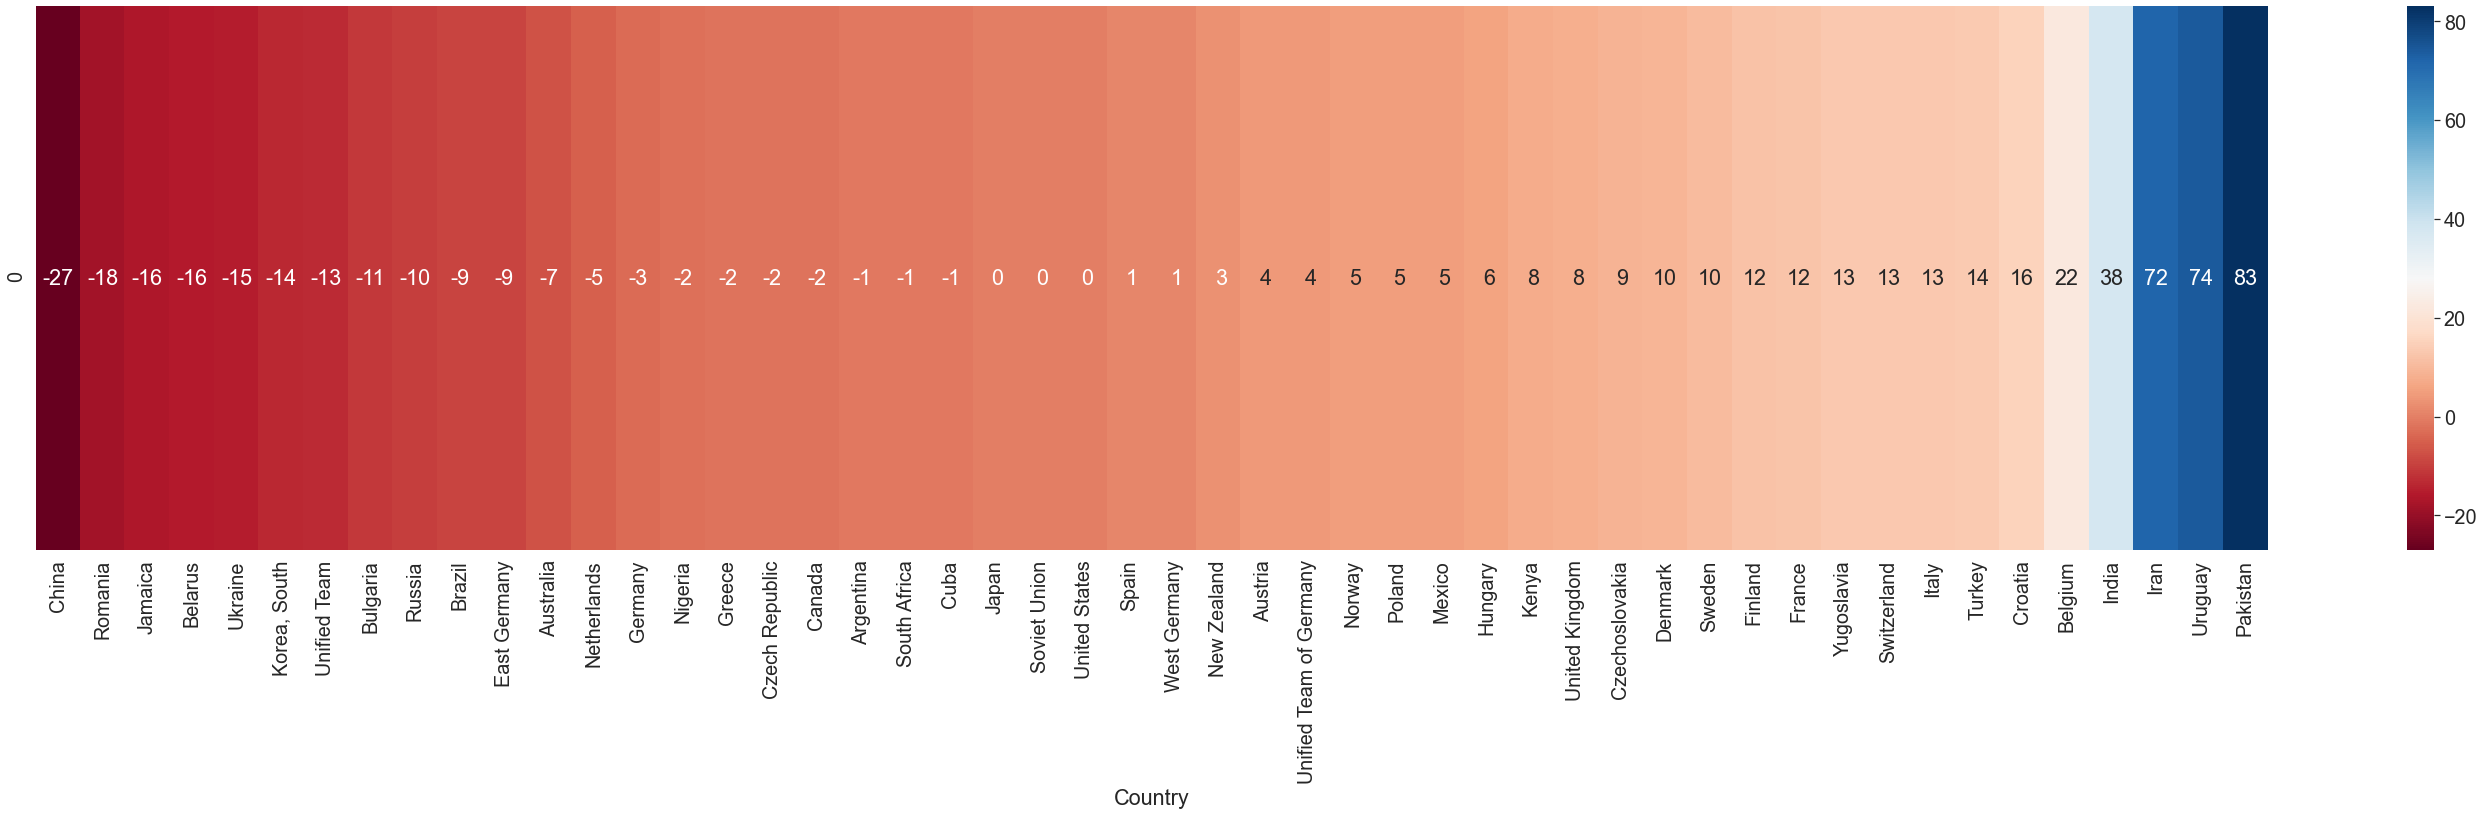

In [440]:
plt.figure(figsize=(50,10))
sns.heatmap(top_50.Women.sub(top_50.Men).sort_values().to_frame().T, annot=True, cmap='RdBu', fmt='2.0f')
plt.show()

## Do Traditions matter?

In [441]:
olympics.head()

,Year,City,Sport,Discipline,Athlete,Code,Gender,Event,Medal,Edition,Country
0,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100M Freestyle,Gold,Summer,Hungary
1,1896,Athens,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100M Freestyle,Silver,Summer,Austria
2,1896,Athens,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100M Freestyle For Sailors,Bronze,Summer,Greece
3,1896,Athens,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100M Freestyle For Sailors,Gold,Summer,Greece
4,1896,Athens,Aquatics,Swimming,"CHASAPIS, Spiridon",GRE,Men,100M Freestyle For Sailors,Silver,Summer,Greece


In [447]:
olympics_50 = olympics.loc[olympics.Country.isin(top_50.index)]

In [449]:
olympics_50 = olympics_50.pivot_table(values = "Medal", index="Country", columns='Sport', aggfunc='count')

In [370]:
medal_rank_c = medal_rank_b.head(21)
medal_rank_c = medal_rank_c.T
medal_rank_c

Country,United States,Soviet Union,United Kingdom,Germany,France,Italy,Sweden,Canada,Australia,Hungary,...,Norway,East Germany,Netherlands,Finland,China,Japan,Switzerland,Romania,"Korea, South",West Germany
Summer,1.0,2.0,3.0,5.0,4.0,6.0,9.0,15.0,7.0,8.0,...,17.0,11.0,10.0,22.0,12.0,13.0,28.0,16.0,18.0,21.0
Winter,1.0,4.0,19.0,7.0,14.0,11.0,6.0,2.0,25.5,28.0,...,3.0,12.0,15.0,5.0,18.0,21.0,8.0,34.5,17.0,16.0
Men,1.0,2.0,3.0,7.0,4.0,5.0,6.0,9.0,12.0,8.0,...,10.0,17.0,14.0,11.0,30.0,13.0,15.0,28.0,25.5,18.0
Women,1.0,2.0,11.0,4.0,16.5,18.0,16.5,7.0,5.0,14.0,...,15.0,8.0,9.0,23.0,3.0,13.0,28.0,10.0,12.0,19.0
Total,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,...,12.0,13.0,14.0,15.0,16.0,17.0,18.0,19.0,20.0,21.0


In [450]:
olympics_50_rank = olympics_50.rank(ascending=False)

In [461]:
olympics_50_rank.fillna(6, inplace=True)

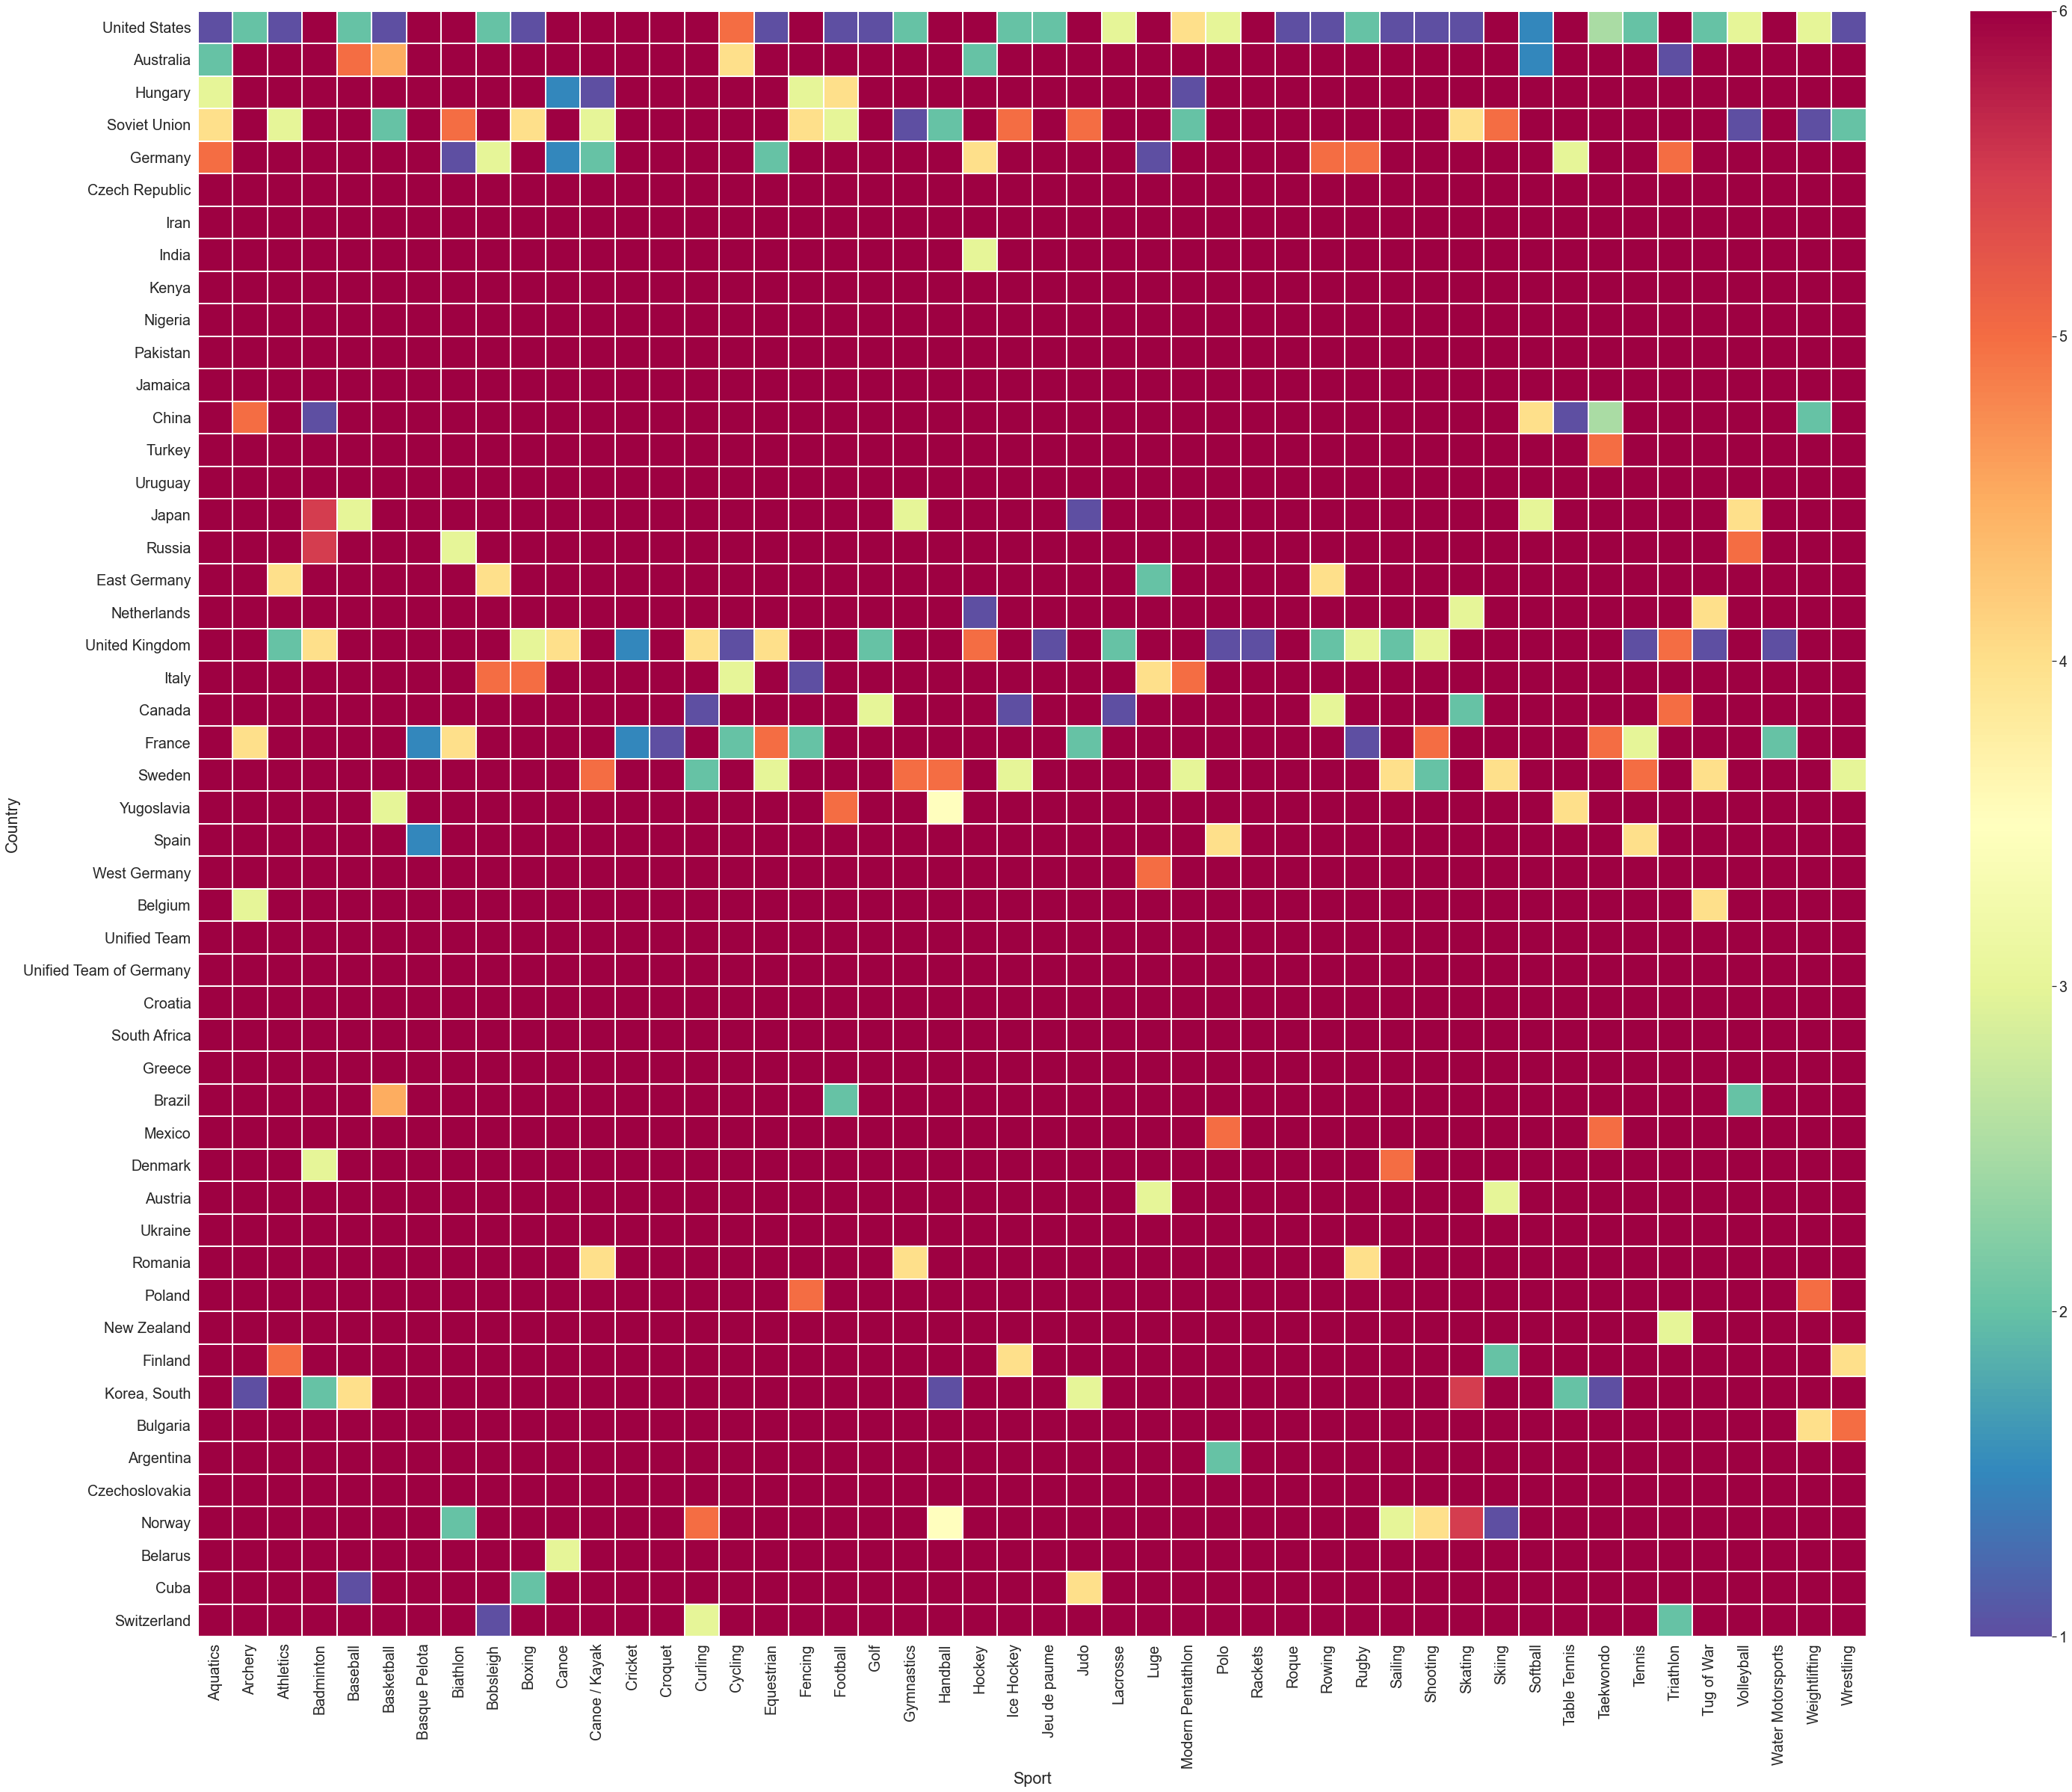

In [465]:
plt.figure(figsize=(50,40))
sns.heatmap(olympics_50_rank.sort_values(by="Aquatics"), cmap='Spectral_r', fmt='2.0f', vmax=6, linewidths=1)
plt.show()

Create the following __Seaborn Heatmap__ that shows the __Ranks__ of Top 50 Countries __by Sports__. <br>
Identify traditional Sports / National Sports for e.g. UK and China!

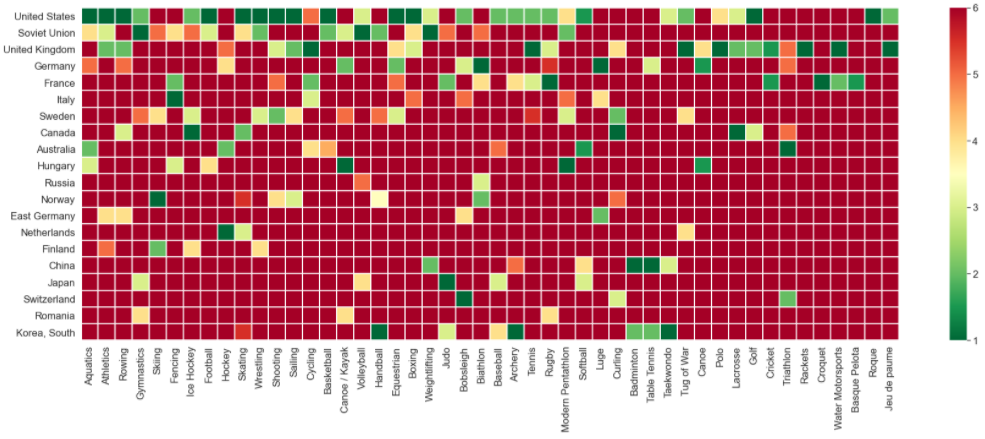

# Missing full Country Names (see Data Cleaning Part 1)

In [ ]:
{'URS': 'Soviet Union',
 'GDR': 'East Germany',
 'ROU': 'Romania',
 'FRG': 'West Germany',
 'TCH': 'Czechoslovakia',
 'YUG': 'Yugoslavia',
 'EUN': 'Unified Team',
 'EUA': 'Unified Team of Germany',
 'ZZX': 'Mixed teams',
 'SRB': 'Serbia',
 'ANZ': 'Australasia',
 'RU1': 'Russian Empire',
 'MNE': 'Montenegro',
 'TTO': 'Trinidad and Tobago',
 'BOH': 'Bohemia',
 'BWI': 'West Indies Federation',
 'SGP': 'Singapore',
 'IOP': 'Independent Olympic Participants'}